In [1]:
import openpyxl as xl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1 - VERİLERİN DÜZENLENMESİ

In [2]:
years = [str(x) for x in range(2009,2022)]

# Orijinal KSH'ler üzerinden her bir KSH raporunun düzenlenmesi ve Kaydedilmesi
for year in years:
    wb = xl.load_workbook("./Kurumsal Sektor Hesaplari - Orijinal/Kurumsal Sektör Hesapları" + " " + year +".xlsx")
    sheet = wb["t_"+ year]
    
    cols = ["Mali Olmayan Şirketler", "Mali Şirketler", 
                             "Genel Devlet", "Hanehalkı-Hizmet", 
                             "Toplam Ekonomi", "Dış Alem", 
                             "Sektörler Toplamı"]

    df = pd.DataFrame(columns = cols + cols)
    source_use_cels = ["J", "K", "L", "M", "N", "O", "P","G", "F", "E", "D", "C", "B", "A"]
    rng = [range(6,16),range(17,26),range(30,46),range(47,59),
       range(63,69),range(70,79),range(82,88),range(89,97),]

    for x in rng:

        for r in x:
            liste = []

            row_value = sheet["I" + str(r)].value
            if row_value in df.index:
                row_value = row_value + "_" + str(r)

            for c in source_use_cels:
                value = sheet[c + str(r)].value
                liste.append(value)

            df.loc[row_value] = liste
            
    df.to_excel("./Kurumsal Sektor Hesaplari - Duzenli/KSH_excel_format_" + year + ".xlsx")
    

# Düzenlenen KHS'lerdeki rakamların hücre bilgileri ve indeksleme
inds_cells = [
            ("Çıktı",                                                 "F2",       1),
            ("MOŞ Çıktı",                                             "B2",       2),
            ("MŞ Çıktı",                                              "C2",       3),
            ("Devlet Çıktı",                                          "D2",       4),
            ("HH Çıktı",                                              "E2",       5),

            ("Piyasa Çıktısı",                                        "F3",       6),
            ("MOŞ Piyasa Çıktısı",                                    "B3",       7),
            ("MŞ Piyasa Çıktısı",                                     "C3",       8),
            ("Devlet Piyasa Çıktısı",                                 "D3",       9),
            ("HH Piyasa Çıktısı",                                     "E3",       10),

            ("Kendi Nihai Tüketimi için Çıktı",                       "F4",       11),
            ("MOŞ Kendi Nihai Tüketimi için Çıktı",                   "B4",       12),
            ("MŞ Kendi Nihai Tüketimi için Çıktı",                    "C4",       13),
            ("Devlet Kendi Nihai Tüketimi için Çıktı",                "D4",       14),
            ("HH Kendi Nihai Tüketimi için Çıktı",                    "E4",       15),

            ("Piyasa Dışı Çıktı",                                     "F5",       16),
            ("MOŞ Piyasa Dışı Çıktı",                                 "B5",       17),
            ("MŞ Piyasa Dışı Çıktı",                                  "C5",       18),
            ("Devlet Piyasa Dışı Çıktı",                              "D5",       19),
            ("HH Piyasa Dışı Çıktı",                                  "E5",       20),

            ("Ara Tüketim",                                           "M6",       21),
            ("MOŞ Ara Tüketim",                                       "I6",       22),
            ("MŞ Ara Tüketim",                                        "J6",       23),
            ("Devlet Ara Tüketim",                                    "K6",       24),
            ("HH Ara Tüketim",                                        "L6",       25),

            ("GS Katma Değer",                                        "M7",       26),
            ("MOŞ GS Katma Değer",                                    "I7",       27),
            ("MŞ GS Katma Değer",                                     "J7",       28),
            ("Devlet GS Katma Değer",                                 "K7",       29),
            ("HH GS Katma Değer",                                     "L7",       30),
            
                     ("Ürün Üzerindeki Net Vergi",                    "Eşitlik",   31), # 32 - 33
            ("Ürün Üzerindeki Vergi",                                 "F25",       32),
            ("Ürün Üzerindeki Sübvansiyon",                           "K28",       33),
                     ("Üretim Üzerindeki Net Vergi",                  "Eşitlik",   34), # 35 - 36
            ("Üretim Üzerideki Vergi",                                "F26",       35),
            ("Üretim Üzerindeki Sübvansiyon",                         "K29",       36),

            ("GSYİH",                                                 "M9",        37),

            ("Sabit Sermaye Oluşumu (Yatırım)",                       "M71",       38),
            ("MOŞ Sabit Sermaye Oluşumu (Yatırım)",                   "I71",       39),
            ("MŞ Sabit Sermaye Oluşumu (Yatırım)",                    "J71",       40),
            ("Devlet Sabit Sermaye Oluşumu (Yatırım)",                "K71",       41),
            ("HH Sabit Sermaye Oluşumu (Yatırım)",                    "L71",       42),

            ("Gayrisafi Sabit Sermaye Oluşumu",                       "M72",       43),
            ("MOŞ Gayrisafi Sabit Sermaye Oluşumu",                   "I72",       44),
            ("MŞ Gayrisafi Sabit Sermaye Oluşumu",                    "J72",       45),
            ("Devlet Gayrisafi Sabit Sermaye Oluşumu",                "K72",       46),
            ("HH Gayrisafi Sabit Sermaye Oluşumu",                    "L72",       47),

            ("Envanterdeki Değişimler",                               "M73",       48), 
            ("MOŞ Envanterdeki Değişimler",                           "I73",       49),
            ("MŞ Envanterdeki Değişimler",                            "J73",       50),
            ("Devlet Envanterdeki Değişimler",                        "K73",       51),
            ("HH Envanterdeki Değişimler",                            "L73",       52),

            ("Değerliler Edinim-Elden Çıkarım",                       "M74",       53), 
            ("MOŞ Değerliler Edinim-Elden Çıkarım",                   "I74",       54), 
            ("MŞ Değerliler Edinim-Elden Çıkarım",                    "J74",       55), 
            ("Devlet Değerliler Edinim-Elden Çıkarım",                "K74",       56), 
            ("HH Değerliler Edinim-Elden Çıkarım",                    "L74",       57), 

            ("Sabit Sermaye Tüketimi (Amostisman)",                   "F75",       58),
            ("Devlet Sabit Sermaye Tüketimi (Amostisman)",            "D75",       59),
                    ("Net Yatırım",                                   "Eşitlik",   60),  # 38 - 58
                

            ("Çalışanlara Yapılan Ödemeler (Yİ -> Yİ)",               "M13",       61),
            ("MOŞ Çalışanlara Yapılan Ödemeler (Yİ -> Yİ)",           "I13",       62),
            ("MŞ Çalışanlara Yapılan Ödemeler (Yİ -> Yİ)",            "J13",       63),
            ("Devlet Çalışanlara Yapılan Ödemeler (Yİ -> Yİ)",        "K13",       64),
            ("HH Çalışanlara Yapılan Ödemeler (Yİ -> Yİ)",            "L13",       65),

            ("Çalışanlara Yapılan Ödemeler (Faktör Geliri)",          "N13",       66),
            ("Çalışanlara Yapılan Ödemeler (Faktör Ödemesi)",         "G23",       67),

            ("Gayrisafi İşletme Artığı",                              "M18",       68),
            ("MOŞ Gayrisafi İşletme Artığı",                          "I18",       69),
            ("MŞ Gayrisafi İşletme Artığı",                           "J18",       70),
            ("Devlet Gayrisafi İşletme Artığı",                       "K18",       71),
            ("Hanehalkı Gayrisafi İşletme Artığı",                    "L18",       72),

            ("Net İşletme Artığı",                                    "M20",       73),
                ("MÜLKİYET GELİRLERİ",                                "Eşitlik",   74),  # (75 + 81 + 87 + 93 + 99)
                ("Mali Olmayan Şirket Mülkiyet Geliri",               "Eşitlik",   75),  # (76 + 77 + 78 + 79 + 80)

            ("MOŞ Faiz Geliri",                                       "B31",       76),
            ("MOŞ Dağıltılmış Gelir Kazancı",                         "B32",       77),
            ("MOŞ DYY Yeniden Yatırım Kazancı",                       "B33",       78),
            ("MOŞ Sigorta Pol. Mülk Geliri",                          "B34",       79),
            ("MOŞ Kira Geliri",                                       "B35",       80),
                ("Mali Şirket Mülkiyet Geliri",                       "Eşitlik",   81),  # (82+83+84+85+86)
            ("MŞ Faiz Geliri",                                        "C31",       82),
            ("MŞ Dağıltılmış Gelir Kazancı",                          "C32",       83),
            ("MŞ DYY Yeniden Yatırım Kazancı",                        "C33",       84),
            ("MŞ Sigorta Pol. Mülk Geliri",                           "C34",       85),
            ("MŞ Kira Geliri",                                        "C35",       86),
                ("Devlet Mülkiyet Geliri",                            "Eşitlik",   87),  # (88+89+90+91+92)
            ("Devlet Faiz Geliri",                                    "D31",       88), 
            ("Devlet Dağıltılmış Gelir Kazancı",                      "D32",       89),
            ("Devlet DYY Yeniden Yatırım Kazancı",                    "D33",       90),
            ("Devlet Sigorta Pol. Mülk Geliri",                       "D34",       91),
            ("Devlet Kira Geliri",                                    "D35",       92),
                ("Hanehalkı Mülkiyet Geliri",                         "Eşitlik",   93),  # (94+95+96+97+98)
            ("Hanehalkı Faiz Geliri",                                 "E31",       94),
            ("Hanehalkı Dağıltılmış Gelir Kazancı",                   "E32",       95),
            ("Hanehalkı DYY Yeniden Yatırım Kazancı",                 "E33",       96),
            ("Hanehalkı Sigorta Pol. Mülk Geliri",                    "E34",       97),
            ("Hanehalkı Kira Geliri",                                 "E35",       98),
                ("Dış Alem Mülkiyet Geliri",                          "Eşitlik",   99),  # (100+101+102+103+104)
            ("Dış Alem Faiz Geliri",                                  "G31",       100),
            ("Dış Alem Dağıltılmış Gelir Kazancı",                    "G32",       101),
            ("Dış Alem DYY Yeniden Yatırım Kazancı",                  "G33",       102),
            ("Dış Alem Sigorta Pol. Mülk Geliri",                     "G34",       103),
            ("Dış Alem Kira Geliri",                                  "G35",       104),
    
                ("MÜLKİYET ÖDEMELERİ",                                "Eşitlik",   105), # (106+112+118+124+130)
                ("Mali Olmayan Şirket Mülkiyet Ödemeleri",            "Eşitlik",   106), # (107+108+109+110+111)
            ("MOŞ Faiz Ödemesi",                                      "I31",       107),
            ("MOŞ Dağıltılmış Gelir Ödemesi",                         "I32",       108),
            ("MOŞ DYY Yeniden Yatırım Ödemesi",                       "I33",       109),
            ("MOŞ Sigorta Pol. Mülk Ödemesi",                         "I34",       110),
            ("MOŞ Kira Ödemesi",                                      "I35",       111),
                ("Mali Şirket Mülkiyet Ödemeleri",                    "Eşitlik",   112), # (113+114+115+116+117)
            ("MŞ Faiz Ödemesi",                                       "J31",       113),
            ("MŞ Dağıltılmış Gelir Ödemesi",                          "J32",       114),
            ("MŞ DYY Yeniden Yatırım Ödemesi",                        "J33",       115),
            ("MŞ Sigorta Pol. Mülk Ödemesi",                          "J34",       116),
            ("MŞ Kira Ödemesi",                                       "J35",       117),
                ("Devlet Mülkiyet Ödemeleri",                         "Eşitlik",   118), # (119+120+121+122+123)
            ("Devlet Faiz Ödemesi",                                   "K31",       119),
            ("Devlet Dağıltılmış Gelir Ödemesi",                      "K32",       120),
            ("Devlet DYY Yeniden Yatırım Ödemesi",                    "K33",       121),
            ("Devlet Sigorta Pol. Mülk Ödemesi",                      "K34",       122),
            ("Devlet Kira Ödemesi",                                   "K35",       123),
                ("Hanehalkı Mülkiyet Ödemeleri",                      "Eşitlik",   124), # (125+126+127+128+129)
            ("Hanehalkı Faiz Ödemesi",                                "L31",       124),
            ("Hanehalkı Dağıltılmış Gelir Ödemesi",                   "L32",       126),
            ("Hanehalkı DYY Yeniden Yatırım Ödemesi",                 "L33",       127),
            ("Hanehalkı Sigorta Pol. Mülk Ödemesi",                   "L34",       128),
            ("Hanehalkı Kira Ödemesi",                                "L35",       129),
                ("Dış Alem Mülkiyet Ödemeleri",                       "Eşitlik",   130), # (131+132+133+134+135)
            ("Dış Alem Faiz Ödemesi",                                 "N31",       131),
            ("Dış Alem Dağıltılmış Gelir Ödemesi",                    "N32",       132),
            ("Dış Alem DYY Yeniden Yatırım Ödemesi",                  "N33",       133),
            ("Dış Alem Sigorta Pol. Mülk Ödemesi",                    "N34",       134),
            ("Dış Alem Kira Ödemesi",                                 "N35",       135),
                
                ("Gelir ve Servet Üzerinden Alınan Vergiler",         "Eşitlik",   136), #  (137+138+139)
            ("MOŞ Kurumlar Vergisi",                                  "I38",       137),
            ("MŞ Kurumlar Vergisi",                                   "J38",       138),
            ("Hanehalkı Gelir Vergisi",                               "L38",       139),

            ("MŞ Net Sosyal Katkı Gelir",                             "C41",       140), 
            ("Devlet Net Sosyal Katkı Gelir",                         "D41",       141),
            ("Hanehalkı Net Sosyal Katkı Ödeme",                      "L41",       142),

            ("MŞ Sosyal Fayda Ödeme",                                 "J42",       143),
            ("Devlet Sosyal Fayda Ödeme",                             "K42",       144),
            ("Hanehalkı Sosyal Fayda Gelir",                          "E42",       145),
            ("Dış Kesim Sosyal Fayda Gelir",                          "G42",       146),

            ("MŞ Net Hayat Dışı Sigorta Pirim Geliri",                "C44",       147),
            ("MOŞ Pirim Ödemesi",                                     "I44",       148),
            ("MŞ Pirim Ödemesi",                                      "J44",       149),
            ("Devlet Pirim Ödemesi",                                  "K44",       150),
            ("Hanehalkı Pirim Ödemesi",                               "L44",       151),
            ("Dış Alem Pirim Ödemesi",                                "N44",       152),

            ("MŞ Hayat Dışı Sigorta Tazminat Ödemesi",                "J45",       153),
            ("MOŞ Tazminat Geliri",                                   "B45",       154),
            ("MŞ Tazminat Geliri",                                    "C45",       155),
            ("Devlet Tazminat Geliri",                                "D45",       156),
            ("Hanehalkı Tazminat Geliri",                             "E45",       157),
            ("Dış Alem Tazminat Geliri",                              "G45",       158),

            ("Cari Uluslararası İşbirliği Gelir",                     "D46",       159),
            ("Cari Uluslararası İşbirliği Ödeme",                     "K46",       160),

            ("Mali Olmayan Şiket Diğer Çeşitli Transfer Geliri",      "B47",       161),
            ("MŞ Diğer Çeşitli Transfer Geliri",                      "C47",       162),
            ("Devlet Diğer Çeşitli Transfer Geliri",                  "D47",       163),
            ("Hanehalkı Diğer Çeşitli Transfer Geliri",               "E47",       164),
            ("Dış Alem Diğer Çeşitli Transfer Geliri",                "G47",       165),

            ("Mali Olmayan Şiket Diğer Çeşitli Transfer Ödeme",       "I47",       166),
            ("MŞ Diğer Çeşitli Transfer Ödeme",                       "J47",       167),
            ("Devlet Diğer Çeşitli Transfer Ödeme",                   "K47",       168),
            ("Hanehalkı Diğer Çeşitli Transfer Ödeme",                "L47",       169),
            ("Dış Alem Diğer Çeşitli Transfer Ödeme",                 "N47",       170),
                ("Toplam Harcanabilir Gelir",                         "Eşitlik",   171), # (172 + 173 + 174 + 175)
            ("Mali Olmayan Şiket Harcanabilir Gelir",                 "I48",       172),
            ("MŞ Harcanabilir Gelir",                                 "J48",       173),
            ("Devlet Harcanabilir Gelir",                             "K48",       174),
            ("Hanehalkı Harcanabilir Gelir",                          "L48",       175),
                
                ("Toplam Nihai Tüketim Harcaması",                    "Eşitlik",   176),  # (177+178)
            ("Hanehalkı Nihai Tüketim Harcaması",                     "L50",       177),
            ("Devlet Nihai Tüketim Harcaması",                        "K50",       178),
            ("MŞ Emeklilik Ödeme",                                    "J53",       179),
            ("Hanehalkı Emeklilik Geliri",                            "E53",       180),
                
                ("Toplam Tasarruf",                                   "Eşitlik",   181), #  (182 + 183 + 184 + 186)
            ("Mali Olmayan Şiket Tasarruf",                           "I54",       182),
            ("MŞ Tasarruf",                                           "J54",       183),
            ("Devlet Gayrisafi Tasarruf",                             "K54",       184),
            ("Devlet Tasarruf",                                       "D64",       185),
            ("Hanehalkı Tasarruf",                                    "L54",       186),

            ("Mal-Hizmet İhracatı",                                   "N55",       187),
            ("Mal - Hizmet İthalatı",                                 "G58",       188),
                ("Mal ve Hizmet Dengesi",                             "N61",       189),  # 187 - 188 
                ("Toplam Faktör Geliri",                              "Eşitlik",   190),  # 66 + 130
                ("Toplam Faktör Ödemeleri",                           "Eşitlik",   191),  # 67 + 99
                ("Net Faktör Geliri",                                 "Eşitlik",   192),  # 190 - 191
                ("Cari Hesap",                                        "Eşitlik",   193),  # 189 + 192
                ("GSMH",                                              "Eşitlik",   194),  # 37 +  192
                ("Dış Alemden (Diğer Cari Transfer) Gelir",           "Eşitlik",   195),  # 152 + 159 + 170
                ("Dış Aleme (Diğer Cari Transfer) Ödeme",             "Eşitlik",   196),  # 146 + 158 + 160 + 165
                ("Net (Diğer Cari Transfer) Gelir",                   "Eşitlik",   197),  # 195-196
                ("Cari Dış Denge",                                    "Eşitlik",   198),  # 193 + 197
       ]


ind    = [x[0] for x in inds_cells]
cells  = [x[1] for x in inds_cells]
iliski = [x[2] for x in inds_cells]

df = pd.DataFrame(columns = ["İliski"] + years, index = ind)
df["İliski"] = range(1, len(iliski) + 1)

for year in years:
    wb = xl.load_workbook("./Kurumsal Sektor Hesaplari - Duzenli/KSH_excel_format_" + year +".xlsx")
    sheet = wb["Sheet1"]
    
    for row, cell in zip(ind, cells):
        if cell == "Eşitlik":
            continue
        value = sheet[cell].value
        df.loc[row, year] = value

# Doğrudan çekilmeyen bilgilerin sonradan düzenlenmesi        
df.iloc[30]  = df.iloc[31]  - df.iloc[32];                                                  df.iloc[30, 0] = 31
df.iloc[33]  = df.iloc[34]  - df.iloc[35];                                                  df.iloc[33, 0] = 34
df.iloc[59]  = df.iloc[37]  - df.iloc[57];                                                  df.iloc[59, 0] = 60
df.iloc[73]  = df.iloc[74]  + df.iloc[80]  + df.iloc[86]  + df.iloc[92]  + df.iloc[98];     df.iloc[73, 0] = 74
df.iloc[74]  = df.iloc[75]  + df.iloc[76]  + df.iloc[77]  + df.iloc[78]  + df.iloc[79];     df.iloc[74, 0] = 75
df.iloc[80]  = df.iloc[81]  + df.iloc[82]  + df.iloc[83]  + df.iloc[84]  + df.iloc[85];     df.iloc[80, 0] = 81
df.iloc[86]  = df.iloc[87]  + df.iloc[88]  + df.iloc[89]  + df.iloc[90]  + df.iloc[91];     df.iloc[86, 0] = 87
df.iloc[92]  = df.iloc[93]  + df.iloc[94]  + df.iloc[95]  + df.iloc[96]  + df.iloc[97];     df.iloc[92, 0] = 93 
df.iloc[98]  = df.iloc[99]  + df.iloc[100] + df.iloc[101] + df.iloc[102] + df.iloc[103];    df.iloc[98, 0] = 99
df.iloc[73]  = df.iloc[74]  + df.iloc[80]  + df.iloc[86]  + df.iloc[92]  + df.iloc[98];     df.iloc[73, 0] = 74
df.iloc[105] = df.iloc[106] + df.iloc[107] + df.iloc[108] + df.iloc[109] + df.iloc[110];    df.iloc[105, 0] = 106 
df.iloc[111] = df.iloc[112] + df.iloc[113] + df.iloc[114] + df.iloc[115] + df.iloc[116];    df.iloc[111, 0] = 112 
df.iloc[117] = df.iloc[118] + df.iloc[119] + df.iloc[120] + df.iloc[121] + df.iloc[122];    df.iloc[117, 0] = 118 
df.iloc[123] = df.iloc[124] + df.iloc[125] + df.iloc[126] + df.iloc[127] + df.iloc[128];    df.iloc[123, 0] = 124 
df.iloc[129] = df.iloc[130] + df.iloc[131] + df.iloc[132] + df.iloc[133] + df.iloc[134];    df.iloc[129, 0] = 130 
df.iloc[104] = df.iloc[105] + df.iloc[111] + df.iloc[117] + df.iloc[123] + df.iloc[129];    df.iloc[104, 0] = 105 
df.iloc[135] = df.iloc[136] + df.iloc[137] + df.iloc[138];                                  df.iloc[135, 0] = 136 
df.iloc[170] = df.iloc[171] + df.iloc[172] + df.iloc[173] + df.iloc[174];                   df.iloc[170, 0] = 171 
df.iloc[175] = df.iloc[176] + df.iloc[177];                                                 df.iloc[175, 0] = 176 
df.iloc[180] = df.iloc[181] + df.iloc[182] + df.iloc[183] + df.iloc[185];                   df.iloc[180, 0] = 181
df.iloc[188] = df.iloc[186] - df.iloc[187];                                                 df.iloc[188, 0] = 189
df.iloc[189] = df.iloc[65]   + df.iloc[129];                                                df.iloc[189, 0] = 190
df.iloc[190] = df.iloc[66]   + df.iloc[98];                                                 df.iloc[190, 0] = 191
df.iloc[191] = df.iloc[189]  - df.iloc[190];                                                df.iloc[191, 0] = 192
df.iloc[192] = df.iloc[188]  + df.iloc[191];                                                df.iloc[192, 0] = 193
df.iloc[193] = df.iloc[36]   + df.iloc[191];                                                df.iloc[193, 0] = 194
df.iloc[194] = df.iloc[151]  + df.iloc[158] + df.iloc[169];                                 df.iloc[194, 0] = 195
df.iloc[195] = df.iloc[145]  + df.iloc[157] + df.iloc[159] + df.iloc[164];                  df.iloc[195, 0] = 196
df.iloc[196] = df.iloc[194]  - df.iloc[195];                                                df.iloc[196, 0] = 197
df.iloc[197] = df.iloc[192]  + df.iloc[196];                                                df.iloc[197, 0] = 198

# Veri yapısına son halinin verilmesi
df["İliski"] = df["İliski"] + 1
df = df.set_index("İliski")
df = df / 1000000
df.head(2)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
İliski,,,,,,,,,,,,,
2,1806.259945,2087.675224,2585.840301,2956.757803,3386.898283,3873.989637,4330.66683,4801.405243,5979.872562,7425.333034,8405.236512,9571.766713,14563.243074
3,1227.772023,1420.634743,1810.737756,2069.480323,2405.776851,2778.516485,3106.903096,3433.818896,4348.561769,5446.121407,6150.993929,6979.055359,10843.77755


# Şekil 2: Türkiye Ekonomisi Temel Büyüklükler ve Büyüme Hızları (2009 - 2021)

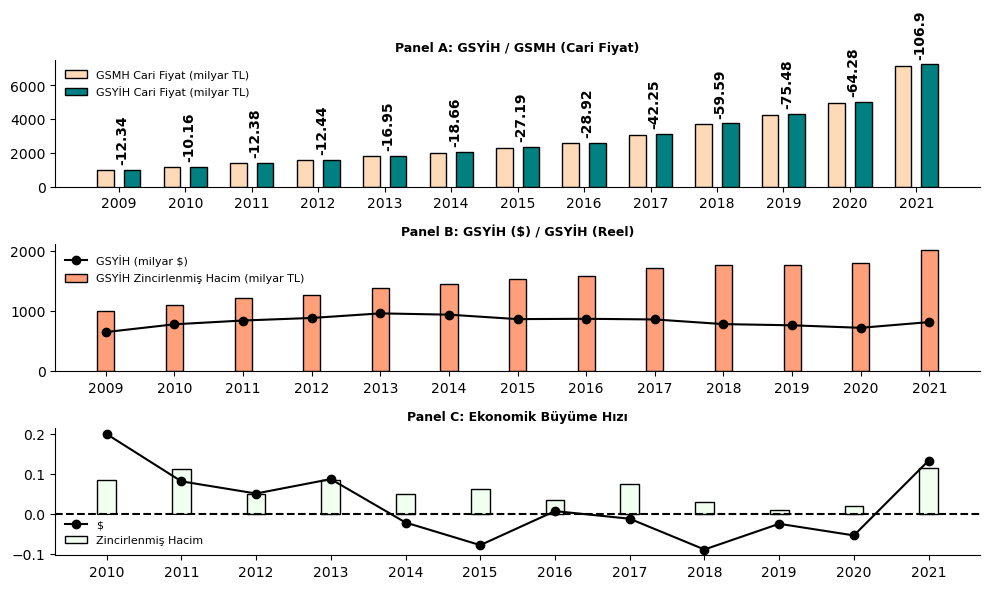

In [3]:
data = pd.read_excel("Veriler.xlsx",
                    sheet_name = "GSMH ve DK",
                    index_col = "index")

yıllar          = df.columns
x_axes          = np.arange(len(yıllar))
ort_dvz_kur     = pd.Series(data["ODK"].to_list(), index = df.columns)
nfg             = df.loc[193]

gsyih              = pd.Series(df.loc[38].to_list(), index = df.columns)   
gsmh               = pd.Series(df.loc[195].to_list(), index = df.columns)    
gsyih_zin_hacim    = pd.Series(data["GSYIH"].to_list(), index = df.columns) 
gsyih_doviz_cinsi  = gsyih / ort_dvz_kur

ekonomik_büyüme     = gsyih_zin_hacim.pct_change().dropna()
ekonomik_büyüme_usd = gsyih_doviz_cinsi.pct_change().dropna()


fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize = (10,6))

ax1.bar(x_axes, gsmh, 0.25, color = "peachpuff", label = "GSMH Cari Fiyat (milyar TL)", edgecolor = "black")
ax1.bar(x_axes+0.4, gsyih, 0.25, color = "teal",
        label = "GSYİH Cari Fiyat (milyar TL)", edgecolor = "black")

for x in range(len(yıllar)):
    ax1.text(x_axes[x]+0.15, gsyih[x]+500, str(round(nfg[x],2)), rotation = 90, fontsize = 10,
#             bbox = {"edgecolor" :"black", "facecolor": "none"},
            fontweight = "bold")
    
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(ymax = 7500)
ax1.legend( fontsize = 8, edgecolor = "none", loc = 2)
ax1.set_title("Panel A: GSYİH / GSMH (Cari Fiyat)", fontweight = "bold", fontsize = 9)

ax1.set_xticks(x_axes+0.2)
ax1.set_xticklabels(yıllar)


ax2.bar(yıllar, gsyih_zin_hacim, 0.25, color = "lightsalmon",
        label = "GSYİH Zincirlenmiş Hacim (milyar TL)", edgecolor = "black")
ax2.plot(gsyih_doviz_cinsi, "-ok", label = "GSYİH (milyar $)")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.legend( fontsize = 8, edgecolor = "none")
ax2.set_title("Panel B: GSYİH ($) / GSYİH (Reel)", fontweight = "bold", fontsize = 9)

ax3.plot(ekonomik_büyüme_usd, "-ok", label = "$")
ax3.bar(yıllar[1:], ekonomik_büyüme, 0.25, label = "Zincirlenmiş Hacim", color = "honeydew",
        edgecolor = "black")
ax3.axhline(y = 0, color = "black", linestyle = "--")
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.legend(fontsize = 8, edgecolor = "none")
ax3.set_title("Panel C: Ekonomik Büyüme Hızı", fontweight = "bold", fontsize = 9)

plt.tight_layout()

In [5]:
ort_dvz_kur

2009    1.55
2010    1.50
2011    1.67
2012    1.79
2013    1.90
2014    2.19
2015    2.72
2016    3.02
2017    3.65
2018    4.81
2019    5.67
2020    7.01
2021    8.89
dtype: float64

# Şekil 3: Türkiye Ekonomisinde 2009 - 2021 Yılları Arasında GSYH Oluşumu (GSYH İçerisindeki Pay %)

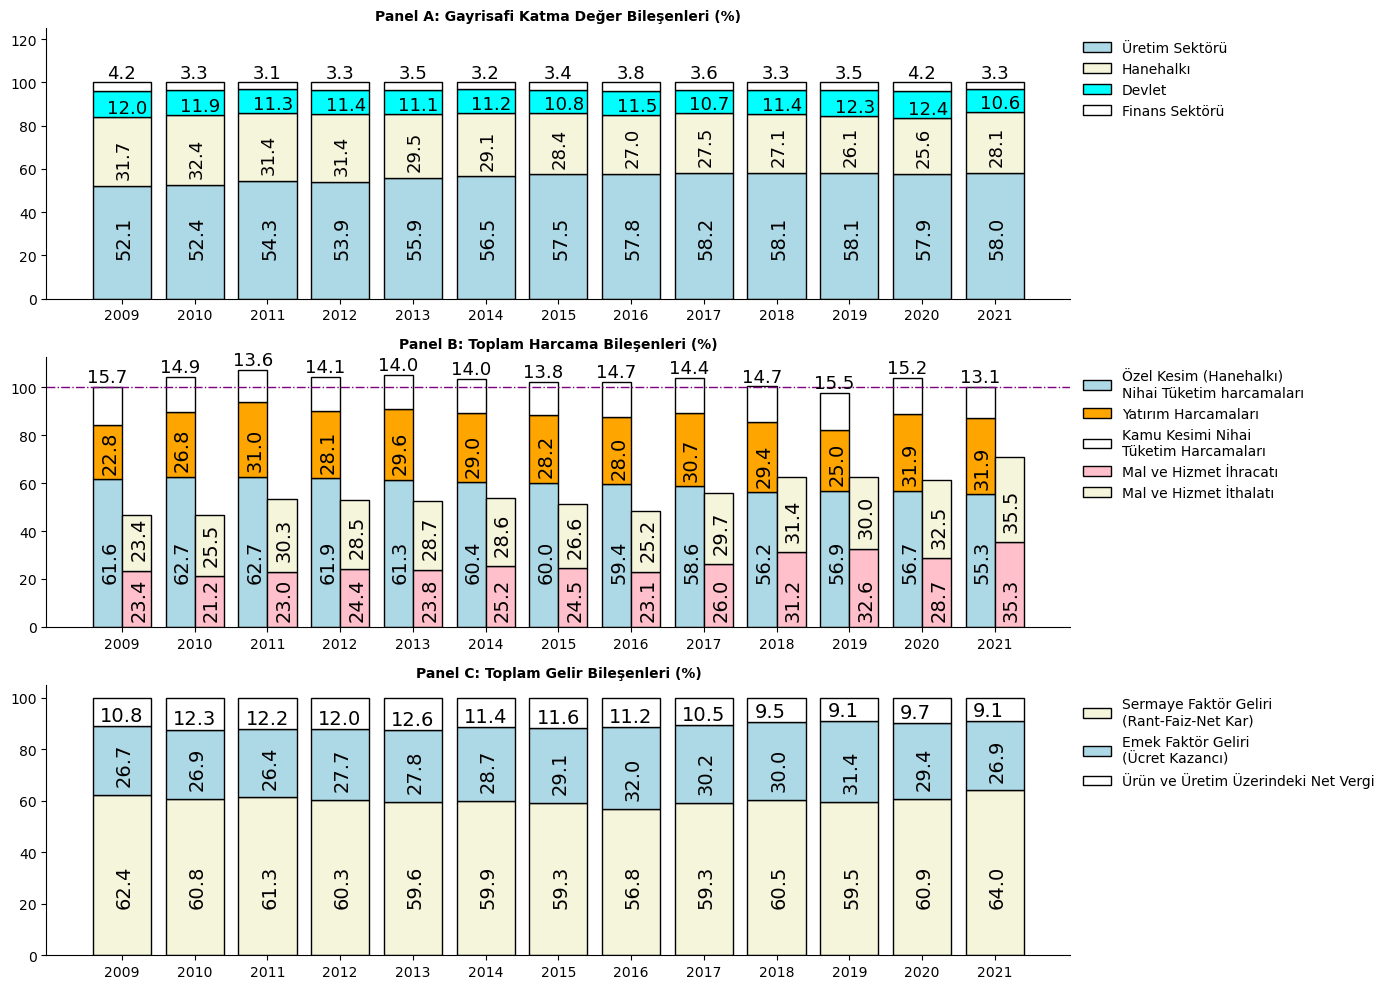

In [21]:
yıllar = df.columns
x_axes = np.arange(len(yıllar))

gs_va = df.loc[27]
mos_va = df.loc[28]
ms_va = df.loc[29]
devlet_va = df.loc[30]
hh_va = df.loc[31]

mos_va_s    = (mos_va / gs_va ) * 100   
ms_va_s     = (ms_va / gs_va) * 100
devlet_va_s = (devlet_va / gs_va) * 100
hh_va_s     = (hh_va / gs_va) * 100

#---------------------------------

gsyih = df.loc[38]
C = df.loc[178]
G = df.loc[179]
I = df.loc[39]
X = df.loc[188]
M = df.loc[189]

Cs = (C / gsyih) * 100
Gs = (G / gsyih) * 100
Is = (I / gsyih) * 100
Xs = (X / gsyih) * 100
Ms = (M / gsyih) * 100

#------------------------------------

w = df.loc[62]
k = df.loc[69]
gtax = df.loc[32]
ptax = df.loc[35]

ws = (w / gsyih)*100
ks = (k / gsyih)*100
ts = ((ptax + gtax) / gsyih)*100

width = 0.8

fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize = (14,10))

#------------------------------------------------------------------------------------------------

ax1.bar(x_axes, mos_va_s, width, label = "Üretim Sektörü", 
        edgecolor = "black", color = "lightblue" )

ax1.bar(x_axes, hh_va_s,width, label ="Hanehalkı", 
        edgecolor = "black", color = "beige", bottom = mos_va_s )

ax1.bar(x_axes, devlet_va_s,width, label =  "Devlet", 
        edgecolor = "black", color = "cyan",bottom = mos_va_s + hh_va_s  )

ax1.bar(x_axes, ms_va_s,width, label = "Finans Sektörü",
        edgecolor = "black", color = "white", bottom = mos_va_s + hh_va_s + devlet_va_s )



for i in range(len(x_axes)):
    ax1.text(x_axes[i]-.1,
             20,
             str(round(mos_va_s[i], 1)),
            rotation = 90,
            fontsize = 14)
    

for i in range(len(x_axes)):
    ax1.text(x_axes[i]-.1,
             mos_va_s[i] + 5,
             str(round(hh_va_s[i], 1)),
            rotation = 90,
            fontsize = 13)
    
    
for i in range(len(x_axes)):
    ax1.text(x_axes[i]-.2,
             (mos_va_s + hh_va_s)[i]  + 2,
             str(round(devlet_va_s[i], 1)),
            fontsize = 13)
    
for i in range(len(x_axes)):
    ax1.text(x_axes[i]-.2,
             (mos_va_s + hh_va_s + devlet_va_s + ms_va_s)[i]  + 2,
             str(round(ms_va_s[i], 1)),
            fontsize = 13)

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left',edgecolor = "none")

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xticks(x_axes)
ax1.set_xticklabels(yıllar)
ax1.set_title("Panel A: Gayrisafi Katma Değer Bileşenleri (%)",fontweight = "bold", fontsize = 10)
ax1.set_ylim(ymax = 125)
#------------------------------------------------------------------------------------------------------------------

width = 0.4

ax2.bar(x_axes, Cs, width, label = "Özel Kesim (Hanehalkı)\nNihai Tüketim harcamaları",
        edgecolor = "black",color = "lightblue" )

ax2.bar(x_axes, Is, width, label =  "Yatırım Harcamaları", 
        edgecolor = "black", color = "Orange", bottom = Cs )

ax2.bar(x_axes, Gs, width, label = "Kamu Kesimi Nihai\nTüketim Harcamaları", 
        edgecolor = "black",color = "White", bottom = Cs + Is )

ax2.bar(x_axes + width, Xs, width, label ="Mal ve Hizmet İhracatı",
        edgecolor = "black", color = "pink" )
ax2.bar(x_axes + width, Ms, width, label ="Mal ve Hizmet İthalatı",
        edgecolor = "black", color = "beige", bottom = Xs )


for i in range(len(x_axes)):
    ax2.text(x_axes[i]-.1,
             20,
             str(round(Cs[i], 1)),
            rotation = 90,
            fontsize = 14)

for i in range(len(x_axes)):
    ax2.text(x_axes[i]-.1,
             Cs[i]+4,
             str(round(Is[i], 1)),
             rotation = 90,
             fontsize = 14)
    
for i in range(len(x_axes)):
    ax2.text(x_axes[i]-.28,
             (Cs + Is + Gs)[i] + 2,
             str(round(Gs[i], 1)),
             fontsize = 13)
    
for i in range(len(x_axes)):
    ax2.text(x_axes[i]+.3,
             4,
             str(round(Xs[i], 1)),
             rotation = 90,
             fontsize = 14)
    
    
for i in range(len(x_axes)):
    ax2.text(x_axes[i]+.3,
             Xs[i]+6,
             str(round(Ms[i], 1)),
             rotation = 90,
             fontsize = 14)

ax2.axhline(y = 100, ls = "-.", lw = 1, color = "purple")
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left',edgecolor = "none")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xticks(x_axes+0.2)
ax2.set_xticklabels(yıllar)
ax2.set_title("Panel B: Toplam Harcama Bileşenleri (%)",fontweight = "bold", fontsize = 10)
#------------------------------------------------------------------------------------------------------------------

width = 0.8

ax3.bar(x_axes, ks, width, label = "Sermaye Faktör Geliri\n(Rant-Faiz-Net Kar)",
        edgecolor = "black", color = "beige" )
ax3.bar(x_axes, ws, width, label = "Emek Faktör Geliri\n(Ücret Kazancı)",
        edgecolor = "black", color = "lightblue", bottom = ks )
ax3.bar(x_axes, ts, width, label =  "Ürün ve Üretim Üzerindeki Net Vergi",
        edgecolor = "black", color = "white", bottom = ks + ws )



for i in range(len(x_axes)):
    ax3.text(x_axes[i]-.1,
             20,
             str(round(ks[i], 1)),
            rotation = 90,
            fontsize = 14)
    
for i in range(len(x_axes)):
    ax3.text(x_axes[i]-.1,
             ks[i]+5,
             str(round(ws[i], 1)),
            rotation = 90,
            fontsize = 14)


for i in range(len(x_axes)):
    ax3.text(x_axes[i]-.3,
             (ks + ws)[i]+2,
             str(round(ts[i], 1)),
            fontsize = 14)

ax3.legend(bbox_to_anchor=(1, 1), loc='upper left',edgecolor = "none")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_xticks(x_axes)
ax3.set_xticklabels(yıllar)
ax3.set_title("Panel C: Toplam Gelir Bileşenleri (%)",fontweight = "bold", fontsize = 10)

plt.tight_layout()

# Şekil 4: Hanehalkı Gelir ve Gider Bileşenlerinin GSMH İçerisindeki Payı 

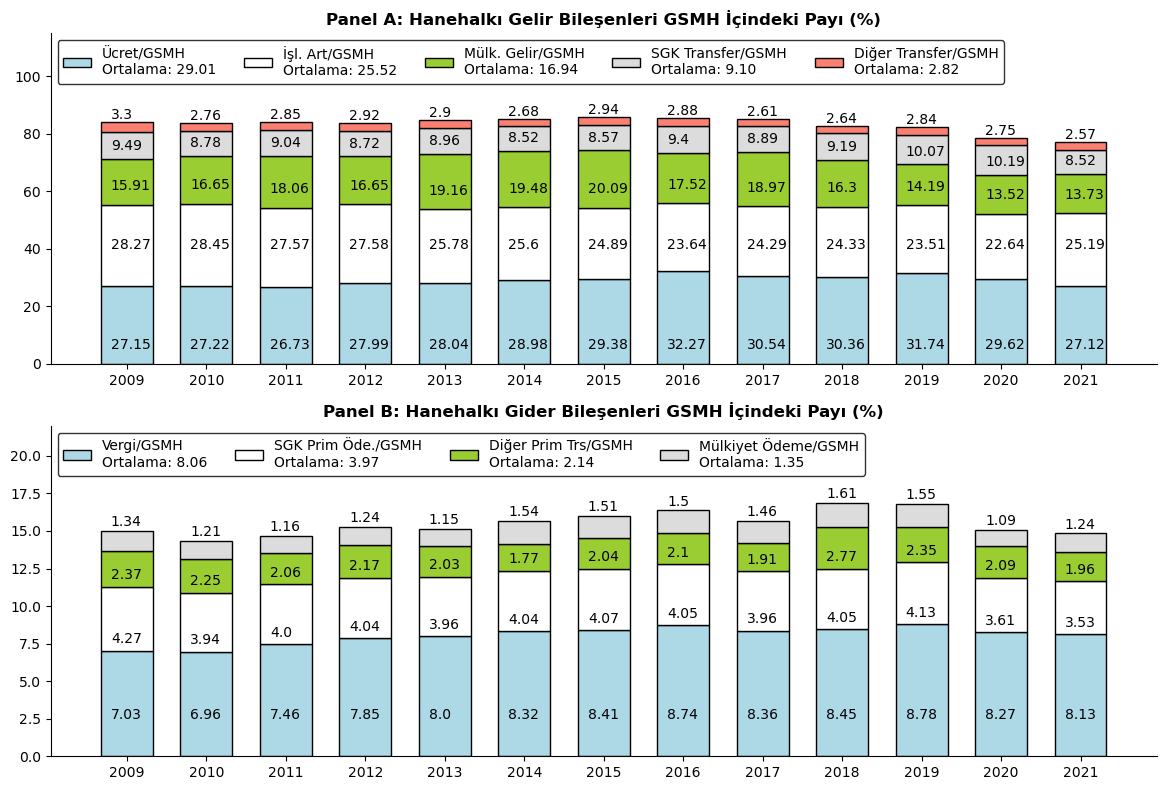

In [22]:
gsyih = df.loc[38]
gsmh = df.loc[195]

cols = [str(x) for x in range(2009,2022)]

inds_cells = [
    
    ("Çalışanlara Yapılan Ödemeler", "E23"),
    ("Brüt İşletme Artığı", "E21"),
    ("Faiz Geliri", "E31"),
    ("Kar Payı", "E32"),
    ("Sigorta Poliçe Sahiplerine Atfedilen Mülk Geliri", "E34"),
    ("Kira Gelirleri", "E35"),
    ("Ayni sosyal transferler dışındaki sosyal faydalar", "E42"),
    ("Hayat-dışı sigorta tazminatları", "E45"),
    ("Diğer çeşitli transferler (gelir)", "E47"),
    
    ("Faiz ödemesi", "L31"),
    ("Kira Ödemesi", "L35"),
    ("Gelir Üzerinden Alınan Vergi", "L39"),
    ("Servet vb diğer cari vergiler", "L40"),
    ("Sosyal Güvenlik Ödemeleri", "L41"),
    ("Net hayat-dışı sigorta primleri", "L44"),
    ("Diğer çeşitli transferler (gider)", "L47"),
    
    ("Nihai Tüketim Harcaması", "L50"),
    ("Emeklilik haklarındaki değişime ilişkin düzeltmeler", "E53"),
    ("Gayrisafi Tasarruf", "L54"),
              
             ]

ind1   = [x[0] for x in inds_cells]
cells1 = [x[1] for x in inds_cells]

df1 = pd.DataFrame(columns = cols, index = ind1)

for data in cols:
    wb1 = xl.load_workbook("./Kurumsal Sektor Hesaplari - Duzenli/KSH_excel_format_" + data +".xlsx")
    sheet1 = wb1["Sheet1"]
    
    for row, cell in zip(ind1, cells1):
        value = sheet1[cell].value
        df1.loc[row][data] = value
        
df1 = df1 / 1000000

#---------------------------------------------------
#---------------------------------------------------
#---------------------------------------------------
#---------------------------------------------------

ucret = df1.iloc[0]
sermaye = df1.iloc[1]
mül_gelir = df1.iloc[2] + df1.iloc[3] + df1.iloc[4]+ df1.iloc[5]
sgk_transfer = df1.iloc[6] 
diger_transfer = df1.iloc[7]+ df1.iloc[8]

faiz_kira = df1.iloc[9] + df1.iloc[10]
vergi = df1.iloc[11] + df1.iloc[12]
sgk_prim = df1.iloc[13]
diger_prim_trs = df1.iloc[14] + df1.iloc[15]
#----------------------------------------------------

ucret_oran = (ucret / gsmh) *100
sermaye_oran = (sermaye / gsmh)*100
mül_gelir_oran = (mül_gelir / gsmh)*100
sgk_transfer_oran = (sgk_transfer / gsmh)*100
diger_transfer_oran = (diger_transfer / gsmh)*100

faiz_kira_oran = (faiz_kira / gsmh)*100
vergi_oran = (vergi / gsmh)*100
sgk_prim_oran = (sgk_prim / gsmh)*100
diger_prim_trs_oran = (diger_prim_trs / gsmh)*100

#----------------------------------------------------
years = ucret.index.to_list()
ind = np.arange(0, len(years))


fig, (ax1,ax2) = plt.subplots(2,1, figsize = (12,8))

width = 0.65
ax1.bar(ind, ucret_oran, width, edgecolor = "k", color = "lightblue",
        label = "Ücret/GSMH\nOrtalama: {:.2f}".format(np.mean(ucret_oran)))

ax1.bar(ind, sermaye_oran, width, edgecolor = "k",color = "white",
        label = "İşl. Art/GSMH\nOrtalama: {:.2f}".format(np.mean(sermaye_oran)),
        bottom = ucret_oran)

ax1.bar(ind, mül_gelir_oran, width, edgecolor = "k",color = "yellowgreen",
        label = "Mülk. Gelir/GSMH\nOrtalama: {:.2f}".format(np.mean(mül_gelir_oran)),
        bottom = ucret_oran + sermaye_oran)

ax1.bar(ind, sgk_transfer_oran, width, edgecolor = "k",color = "gainsboro",
        label = "SGK Transfer/GSMH\nOrtalama: {:.2f}".format(np.mean(sgk_transfer_oran)),
        bottom = ucret_oran + sermaye_oran + mül_gelir_oran)

ax1.bar(ind, diger_transfer_oran, width, edgecolor = "k",color = "salmon",
        label = "Diğer Transfer/GSMH\nOrtalama: {:.2f}".format(np.mean(diger_transfer_oran)),
        bottom = ucret_oran + sermaye_oran + mül_gelir_oran +sgk_transfer_oran )

i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2, 5, 
             str(round(ucret_oran[j], 2)))
    
i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2, 40,
             str(round(sermaye_oran[j], 2)) )

i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2, (ucret_oran + sermaye_oran)[j]+5,
             str(round(mül_gelir_oran[j], 2)) )
    
i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2,(ucret_oran + sermaye_oran + mül_gelir_oran)[j]+3 ,
             str(round(sgk_transfer_oran[j], 2)) )
i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2,
             (ucret_oran + sermaye_oran + mül_gelir_oran + 
              sgk_transfer_oran + diger_transfer_oran )[j]+1 ,
             str(round(diger_transfer_oran[j], 2)) )


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(ncol = 5, edgecolor = "k", loc = 2)
ax1.set_ylim(ymax=115)
ax1.set_xticks(ind)
ax1.set_xticklabels(years)
ax1.set_title("Panel A: Hanehalkı Gelir Bileşenleri GSMH İçindeki Payı (%)", fontweight = "bold")

#------------------------------------------------------------------------

ax2.bar(ind, sgk_prim_oran, width, edgecolor = "k",color = "lightblue",
        label = "Vergi/GSMH\nOrtalama: {:.2f}".format(np.mean(sgk_prim_oran)))

ax2.bar(ind, vergi_oran, width, edgecolor = "k",color = "white",
        label = "SGK Prim Öde./GSMH\nOrtalama: {:.2f}".format(np.mean(vergi_oran)),
        bottom = sgk_prim_oran)

ax2.bar(ind, diger_prim_trs_oran, width, edgecolor = "k",color = "yellowgreen",
        label = "Diğer Prim Trs/GSMH\nOrtalama: {:.2f}".format(np.mean(diger_prim_trs_oran)),
        bottom = sgk_prim_oran + vergi_oran)

ax2.bar(ind, faiz_kira_oran, width, edgecolor = "k", color = "gainsboro",
        label = "Mülkiyet Ödeme/GSMH\nOrtalama: {:.2f}".format(np.mean(faiz_kira_oran)),
        bottom = sgk_prim_oran + vergi_oran + diger_prim_trs_oran)



i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2, 2.5, str(round(sgk_prim_oran[j], 2)) )
    
i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2, (sgk_prim_oran)[j]+.5,
             str(round(vergi_oran[j], 2)) )

i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2, (sgk_prim_oran + vergi_oran )[j]+.5,
             str(round(diger_prim_trs_oran[j], 2)) )
    

i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2, (sgk_prim_oran + vergi_oran +diger_prim_trs_oran + 
                        faiz_kira_oran)[j]+.3,
             str(round(faiz_kira_oran[j], 2)) )
    

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(ncol = 4, edgecolor = "k", loc = 2)
ax2.set_ylim(ymax=22)

ax2.set_xticks(ind)
ax2.set_xticklabels(years)

ax2.set_title("Panel B: Hanehalkı Gider Bileşenleri GSMH İçindeki Payı (%)", fontweight = "bold")

plt.tight_layout()

# Şekil 5: Hanehalkı Mülkiyet Gelir ve Ödemelerinin Karşılaştırılması (milyar TL)

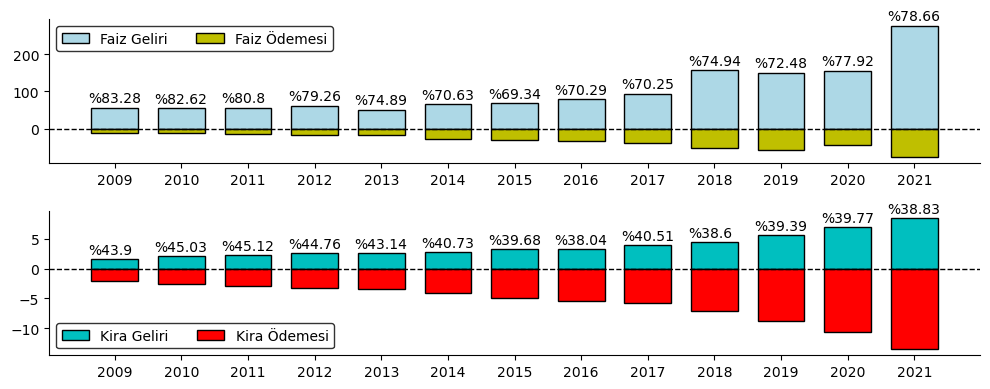

In [23]:
faiz_gelir = df1.iloc[2]
faiz_ödeme = -1*df1.iloc[9]
kira_gelir = df1.iloc[5]
kira_ödeme = -1*df1.iloc[10]

faiz_gelir_oran = faiz_gelir / (faiz_gelir + -1*faiz_ödeme)
kira_gelir_oran = kira_gelir / (kira_gelir + -1*kira_ödeme)

ind = np.arange(0, len(faiz_gelir))
yillar = df1.columns


fig,(ax1, ax2) = plt.subplots(2,1,figsize = (10,4))

ax1.bar(ind, faiz_gelir, 0.7, edgecolor = "k", color = "lightblue", label = "Faiz Geliri")
ax1.bar(ind, faiz_ödeme, 0.7, edgecolor = "k", color = "y", label = "Faiz Ödemesi")

i = 0
for index in ind:
    ax1.text(index-0.4, faiz_gelir[i]+15, "%" +str(round(faiz_gelir_oran[i]*100, 2)))
    i+=1

    
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.axhline(y = 0, lw= 1, ls="--", color = "k")
ax1.set_xticks(ind)
ax1.set_xticklabels(yillar)
ax1.legend(ncol = 2, edgecolor = "k")


ax2.bar(ind, kira_gelir, 0.7, edgecolor = "k", color = "c", label = "Kira Geliri")
ax2.bar(ind, kira_ödeme, 0.7, edgecolor = "k", color = "r", label = "Kira Ödemesi")

i = 0
for index in ind:
    ax2.text(index-0.4, kira_gelir[i]+.8, "%" + str(round(kira_gelir_oran[i]*100, 2)))
    i+=1

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.axhline(y = 0, lw= 1, ls="--", color = "k")
ax2.set_xticks(ind)
ax2.set_xticklabels(yillar)
ax2.legend(ncol = 2, edgecolor = "k", loc = 3)

plt.tight_layout()

# Şekil 6: Hanehalkı Tüketim ve Tasarruf Eğilimleri 

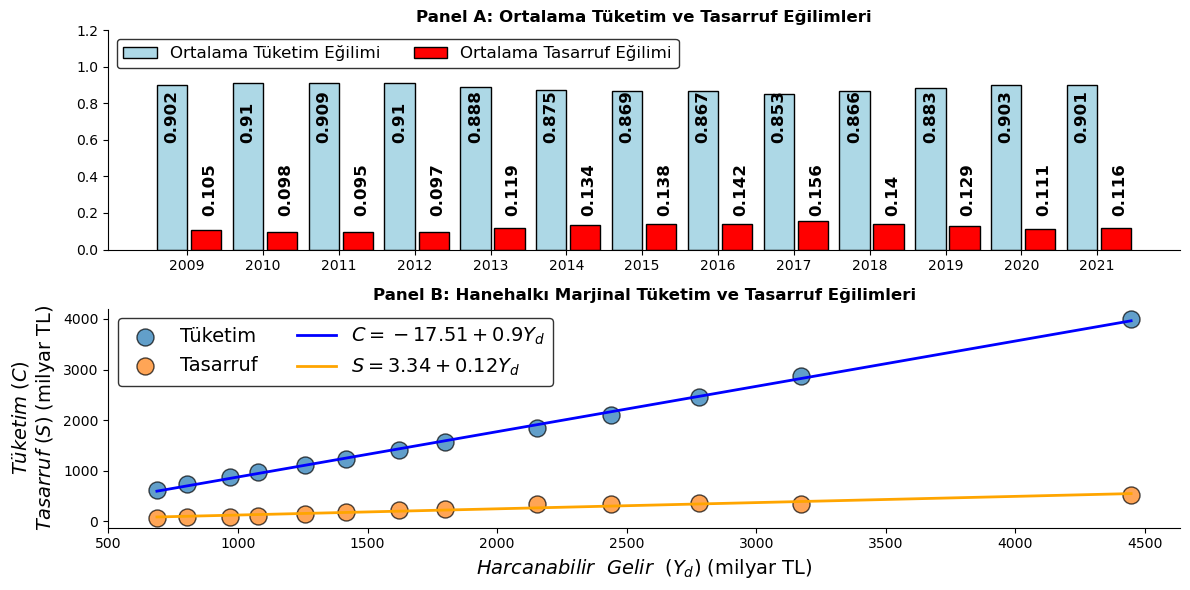

In [24]:
h_gelir = (ucret + sermaye + mül_gelir + sgk_transfer + diger_transfer) - (faiz_kira + vergi + sgk_prim + diger_prim_trs)
nih_tuk = df1.iloc[16]
tasarruf = df1.iloc[18]


ort_tuk_egilim = nih_tuk / h_gelir
ort_tas_egilim = tasarruf / h_gelir

ind = np.arange(0, len(df1.columns))
yillar = df1.columns

b1, a1 = np.polyfit(h_gelir.to_list(), nih_tuk.to_list(), deg=1)
b2, a2 = np.polyfit(h_gelir.to_list(), tasarruf.to_list(), deg=1)

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,6))


ax1.bar(ind, ort_tuk_egilim, 0.4, color = "lightblue",
        edgecolor = "k", label = "Ortalama Tüketim Eğilimi" )
ax1.bar(ind+.45, ort_tas_egilim, 0.4, color = "r",
        edgecolor = "k" , label = "Ortalama Tasarruf Eğilimi")

for index, val in zip(ind,ort_tuk_egilim ):
    ax1.text(index-0.1, 0.6, str(round(val,3)), rotation = 90,
             fontweight = "bold", fontsize = 12)
    
for index, val in zip(ind,ort_tas_egilim ):
    ax1.text(index+0.4, 0.2, str(round(val,3)), rotation = 90,
             fontweight = "bold", fontsize = 12)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax1.legend(ncol = 2, loc = 2, edgecolor = "k", fontsize = 12)
ax1.set_ylim(ymax = 1.2)
# ax1.set_ylabel("Ortalama\nTüketim ve Tasarruf Eğilimi")

ax1.set_xticks(ind + 0.2)
ax1.set_xticklabels(yillar)
ax1.set_title("Panel A: Ortalama Tüketim ve Tasarruf Eğilimleri", fontweight = "bold")

ax2.scatter(h_gelir, nih_tuk,s=150, alpha=0.7,
           edgecolors="k", label = "Tüketim" )
ax2.scatter(h_gelir, tasarruf, s=150,
           alpha=0.7, edgecolors="k", label = "Tasarruf")


xseq = np.linspace(int(np.min(h_gelir)), int(np.max(h_gelir)), int(np.max(h_gelir))*2  )



ax2.plot(xseq, a1 + b1 * xseq, color="b", lw = 2, 
        label = '$C = {} + {}Y_d$'.format(round(a1,2), round(b1,2)) )
ax2.plot(xseq, a2 + b2 * xseq, color="orange", lw = 2,
       label = "$S = {} + {}Y_d$".format(round(a2,2), round(b2,2)))


ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(edgecolor = "black", ncol = 2, fontsize = 14)


ax2.set_xlabel("$Harcanabilir$  $Gelir$  $(Y_d) $ (milyar TL)", fontsize = 14);
ax2.set_ylabel("$Tüketim$ $(C) $\n$Tasarruf$ $(S) $ (milyar TL)", fontsize = 14);
ax2.set_title("Panel B: Hanehalkı Marjinal Tüketim ve Tasarruf Eğilimleri", fontweight = "bold")

plt.tight_layout()


# Şekil 7: Kamu Kesimi Gelir ve Gider Bileşenleri (milyar TL)

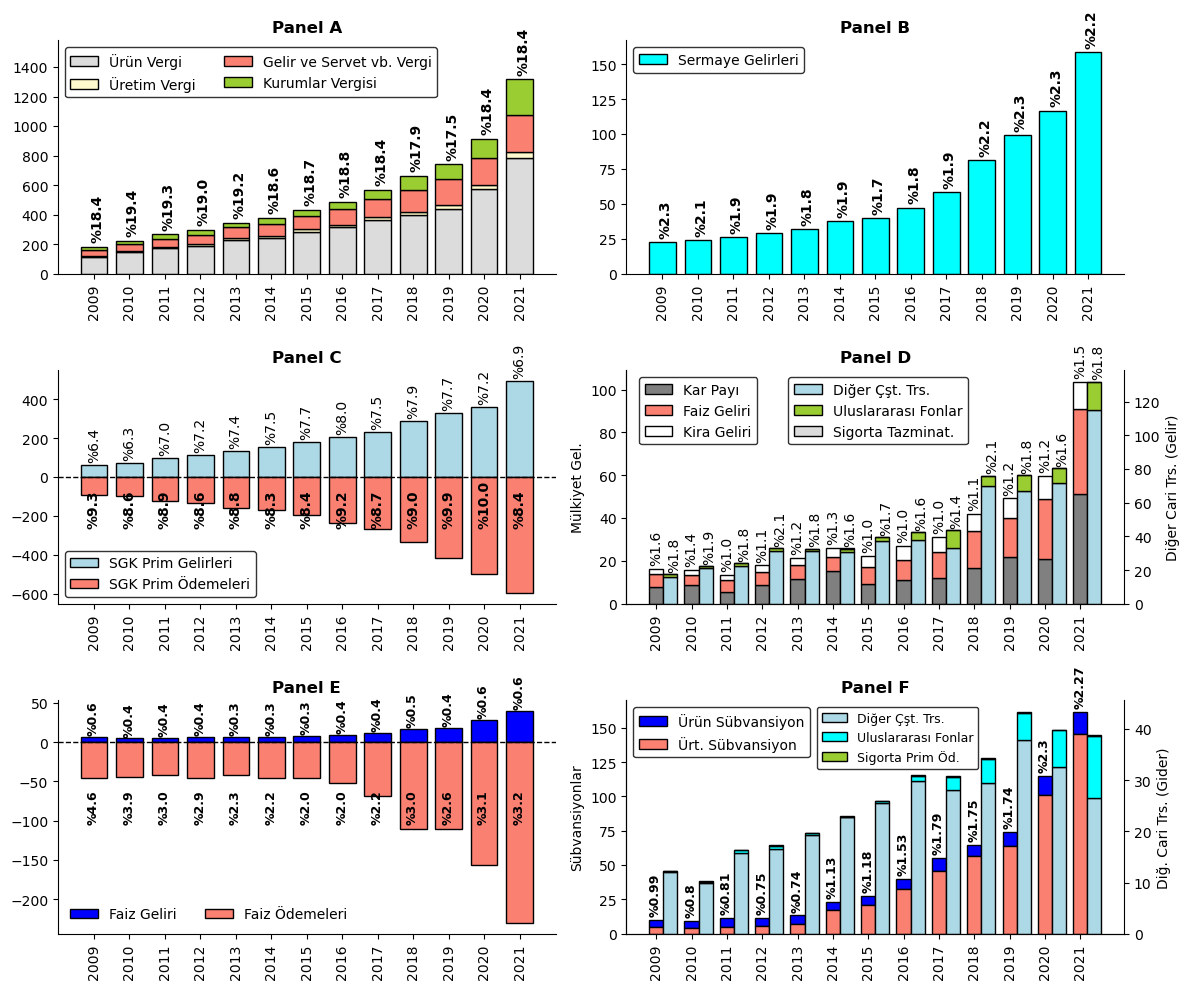

In [25]:
cols = [str(x) for x in range(2009,2022)]

inds_cells2 = [
    
    ("İşletme Artığı (Gayrisafi)", "D21"),
    ("Ürün Üzerindeki Vergi", "D25"),
    ("Üretim Üzerindeki Vergi", "D26"),
    ("Üretim Sektörü Kurumlar Vergisi", "I39"),
    ("Finans sektörü kurumlar vergisi", "J38"),
    ("Gelir vergisi", "L39"),
    ("Servet vb diğer cari vergi", "L40"),
    ("Faiz geliri", "D31"),
    ("Kar payı", "D32"),
    ("Sigorta poliçe sahiplerine atfedilen mülk geliri", "D34"),
    ("Kira Geliri", "D35"),
    ("SGK Pirim Gelirleri", "D41"),
    ("Hayat-dışı sigorta tazminatları", "D45"),
    ("Cari uluslararası işbirliği (Gelir)", "D46"),
    ("Diğer çeşitli transferler (Gelir)", "D47"),
    
    ("Ürün üzerindeki sübvansiyon", "K28"),
    ("Üretim üzerindeki sübvansiyon", "K29"),
    ("Faiz Ödemeleri", "K31"),
    ("Ayni sosyal transferler dışındaki sosyal faydalar", "K42"),
    ("Net hayat-dışı sigorta primleri", "K44"),
    ("Cari uluslararası işbirliği (Gider)", "K46"),
    ("Diğer çeşitli transferler (Gider)", "K47"),
    
    ("Nihai Tüketi Harcaması", "K50"),
    ("Gayrisafi Tasarruf", "K54"),
    ("Sabit Sermaye Tüketimi", "D75"),
    ("Net Tasarruf", "D64"),

             ]

ind2   = [x[0] for x in inds_cells2]
cells2 = [x[1] for x in inds_cells2]
df2 = pd.DataFrame(columns = cols, index = ind2)

for data in cols:
    wb2 = xl.load_workbook("./Kurumsal Sektor Hesaplari - Duzenli/KSH_excel_format_" + data +".xlsx")
    sheet2 = wb2["Sheet1"]
    
    for row, cell in zip(ind2, cells2):
        value = sheet2[cell].value
        df2.loc[row][data] = value


df2 = df2/1000000

#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------

ürün_vergi = df2.iloc[1]
üretim_vergi = df2.iloc[2]
kurumlar_vergisi = df2.iloc[3] + df2.iloc[4]
gelir_servet_vergi = df2.iloc[5] + df2.iloc[6]

sermaye = df2.iloc[0]
sgk_prim = df2.iloc[11]

faiz = df2.iloc[7]
kar_payı = df2.iloc[8]
sigorta = df2.iloc[9]
kira = df2.iloc[10]

sig_tazminat = df2.iloc[12]
ulus_is = df2.iloc[13]
diger_trs = df2.iloc[14]


top_gelir = ürün_vergi + üretim_vergi + kurumlar_vergisi + gelir_servet_vergi + sermaye + \
            sgk_prim + faiz + kar_payı + sigorta + kira + sig_tazminat + ulus_is + diger_trs

vergi         = ürün_vergi + üretim_vergi + kurumlar_vergisi + gelir_servet_vergi
mülkiyet      = (faiz + kar_payı + sigorta + kira)
diger         = (sig_tazminat + ulus_is + diger_trs)


vergi_oran      = vergi / gsmh  
sermaye_oran    = sermaye /  gsmh
sgk_prim_oran   = sgk_prim / gsmh
mülkiyet_oran   = mülkiyet / gsmh
diger_oran     = diger / gsmh
faiz_oran       = faiz / gsmh
# toplam_sub_oran = (urun_sub + urt_sub) / gsmh

vergi_oran1    = vergi / top_gelir  
sermaye_oran1  = sermaye /  top_gelir
sgk_prim_oran1 = sgk_prim / top_gelir
mülkiyet_oran1 = mülkiyet / top_gelir
diger_oran1    = diger / top_gelir
faiz_oran1     = faiz / top_gelir

# toplam_sub_oran = (urun_sub + urt_sub) / gsmh





#-------------------------------------------------------------------------
sgk_prim_ödeme = df2.iloc[18]
faiz_odeme     = df2.iloc[17]
sgk_prim_ödeme_oran = sgk_prim_ödeme / gsmh
faiz_odeme_oran     = faiz_odeme / gsmh
#--------------------------------------------------------------------------


ind = np.arange(0, len(sermaye))
yillar = df2.columns
width = 0.75
width2=0.4


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (12,10))

#PANEL A-------------------------------------------------------------------
ax1.bar(ind, ürün_vergi, width, edgecolor = "k", 
        color = "gainsboro", label = "Ürün Vergi" )
ax1.bar(ind, üretim_vergi, width, edgecolor = "k", 
        color = "lemonchiffon", label = "Üretim Vergi", bottom = ürün_vergi )

ax1.bar(ind, gelir_servet_vergi, width, edgecolor = "k", 
        color = "salmon", label = "Gelir ve Servet vb. Vergi", bottom = ürün_vergi + üretim_vergi )
ax1.bar(ind, kurumlar_vergisi, width, edgecolor = "k", 
        color = "yellowgreen", label = "Kurumlar Vergisi",
        bottom = gelir_servet_vergi + ürün_vergi + üretim_vergi)

i=0
for index in ind:
    ax1.text(index-.1, vergi[i]+50,  "%" + str(round(vergi_oran[i]*100, 1)),
             fontweight = "bold", rotation = 90)
    i+=1

ax1.set_xticks(ind)
ax1.set_xticklabels(yillar, rotation = 90)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(ncol = 2, loc = 2, edgecolor = "k", fontsize = 10)
ax1.set_ylim(ymax = int(np.max(vergi)) * 1.2)
ax1.set_title("Panel A", fontweight = "bold")

#PANEL B-------------------------------------------------------------------

ax2.bar(ind, sermaye, width, edgecolor = "k", 
        color = "aqua", label = "Sermaye Gelirleri")

i=0
for index in ind:
    ax2.text(index-.1, sermaye[i]+5,  "%"+str(round(sermaye_oran[i]*100, 1)),
             fontweight = "bold", rotation = 90)
    i+=1
ax2.set_xticks(ind)
ax2.set_xticklabels(yillar, rotation = 90)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(loc = 2, edgecolor = "k", fontsize = 10)
ax2.set_title("Panel B", fontweight = "bold")

#PANEL C-------------------------------------------------------------------

ax3.bar(ind, sgk_prim, width, edgecolor = "k", 
        color = "lightblue", label = "SGK Prim Gelirleri" )
ax3.bar(ind, -1*sgk_prim_ödeme, width, edgecolor = "k", 
        color = "salmon", label = "SGK Prim Ödemeleri" )

i=0
for index in ind:
    ax3.text(index-.2, sgk_prim[i]+30,  "%" + str(round(sgk_prim_oran[i]*100, 1)),
              rotation = 90)
    i+=1
    
i=0
for index in ind:
    ax3.text(index-.2, -250,  "%" + str(round(sgk_prim_ödeme_oran[i]*100, 1)),
              rotation = 90, fontweight = "bold")
    i+=1

ax3.axhline(y=0, lw = 1, ls = "--", color = "k")
ax3.set_xticks(ind)
ax3.set_xticklabels(yillar, rotation = 90)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.legend( edgecolor = "k", fontsize = 10, loc = 3)
ax3.set_title("Panel C", fontweight = "bold")


#PANEL D-------------------------------------------------------------------
ax4.bar(ind, kar_payı, width2, edgecolor = "k", 
        color = "grey", label = "Kar Payı" )

ax4.bar(ind, faiz, width2, edgecolor = "k", 
        color = "salmon", label = "Faiz Geliri", bottom = kar_payı )

ax4.bar(ind, kira, width2, edgecolor = "k", 
        color = "white", label = "Kira Geliri", bottom = kar_payı + faiz )

ax44 = ax4.twinx()

ax44.bar(ind+width2, diger_trs, width2, edgecolor = "k", 
        color = "lightblue", label = "Diğer Çşt. Trs." )

ax44.bar(ind+width2, ulus_is, width2, edgecolor = "k", 
        color = "yellowgreen", label = "Uluslararası Fonlar", bottom = diger_trs )

ax44.bar(ind+width2, sig_tazminat, width2, edgecolor = "k", 
        color = "gainsboro", label = "Sigorta Tazminat.", bottom = diger_trs + ulus_is )



i=0
for index in ind:
    ax4.text(index-.2, mülkiyet[i]+3,  "%" + str(round(mülkiyet_oran[i]*100, 1)),
             rotation = 90)
    i+=1
    
i=0
for index in ind:
    ax44.text(index+.3, diger[i]+3,  "%" + str(round(diger_oran[i]*100, 1)),
             rotation = 90)
    i+=1



ax4.set_xticks(ind)
ax4.set_xticklabels(yillar, rotation = 90)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax44.spines["top"].set_visible(False)
ax4.legend(edgecolor = "k", fontsize = 10, facecolor = "none",
           bbox_to_anchor=(-0.223, 0.5, 0.5, 0.5))
ax44.legend(edgecolor = "k", fontsize = 10, facecolor = "none",
           bbox_to_anchor=(0.2, 0.5, 0.5, 0.5))
ax4.set_title("Panel D", fontweight = "bold")
ax4.set_ylabel("Mülkiyet Gel.")
ax44.set_ylabel("Diğer Cari Trs. (Gelir)")


#PANEL E-------------------------------------------------------------------

ax5.bar(ind,  faiz, width, label = "Faiz Geliri", edgecolor = "k", color = "b")
ax5.bar(ind, -1*faiz_odeme, width, label = "Faiz Ödemeleri", edgecolor = "k", color = "salmon")
ax5.axhline(y=0, lw = 1, ls = "--", color = "k" )


i=0
for index in ind:
    ax5.text(index-.2, faiz[i]+6,  "%" + str(round(faiz_oran[i]*100, 1)),
             rotation = 90,  fontweight = "bold", fontsize = 9)
    i+=1
    
    
i=0
for index in ind:
    ax5.text(index-.2, -100,  "%" + str(round(faiz_odeme_oran[i]*100, 1)),
             rotation = 90,  fontweight = "bold", fontsize = 9)
    i+=1


ax5.set_xticks(ind)
ax5.set_xticklabels(yillar, rotation = 90)
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
ax5.legend(ncol = 2, edgecolor = "none", fontsize = 10, facecolor = "none", loc = 3)
ax5.set_title("Panel E", fontweight = "bold")

#PANEL F-------------------------------------------------------------------
sgk_prim_ödeme = df2.iloc[18]
faiz_odeme     = df2.iloc[17]

urun_sub       = df2.iloc[15]
urt_sub        = df2.iloc[16]

sig_prim       = df2.iloc[19]
is_bir_gider   = df2.iloc[20]
diger_ces_tranf_gider = df2.iloc[21]

toplam_sub_oran = (urun_sub + urt_sub) / gsmh


ax6.bar(ind,  urun_sub , width2, label = "Ürün Sübvansiyon", 
        edgecolor = "k", color = "b", bottom = urt_sub)
ax6.bar(ind,  urt_sub , width2, label = "Ürt. Sübvansiyon", 
        edgecolor = "k", color = "Salmon")

i=0
for index in ind:
    ax6.text(index-.2, (urun_sub + urt_sub)[i]+5,  "%" + str(round(toplam_sub_oran[i]*100, 2)),
             rotation = 90,  fontweight = "bold", fontsize = 9)
    i+=1




ax66 = ax6.twinx()

ax66.bar(ind+width2,  diger_ces_tranf_gider , width2, label = "Diğer Çşt. Trs.", 
        edgecolor = "k", color = "lightblue")
ax66.bar(ind+width2,  is_bir_gider , width2, label = "Uluslararası Fonlar", 
        edgecolor = "k", color = "aqua", bottom = diger_ces_tranf_gider)
ax66.bar(ind+width2,  sig_prim , width2, label = "Sigorta Prim Öd.", 
        edgecolor = "k", color = "yellowgreen",
         bottom = diger_ces_tranf_gider + is_bir_gider
        )


ax6.set_xticks(ind)
ax6.set_xticklabels(yillar, rotation = 90)

ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)

ax6.legend( edgecolor = "k", fontsize = 10, facecolor = "none")
ax66.legend(edgecolor = "k", fontsize = 9, facecolor = "none",
            loc='best', bbox_to_anchor = (0.37, 0.5, 0.5, 0.5))

ax66.spines["top"].set_visible(False)
ax6.set_ylabel("Sübvansiyonlar")
ax66.set_ylabel("Diğ. Cari Trs. (Gider)")
ax6.set_title("Panel F", fontweight = "bold")

plt.tight_layout()

# Şekil 8: Kamu Kesimi Tasarruf (milyar TL)

Text(0, 0.5, 'Harcanabilir Gelir\nNihai Tüketim')

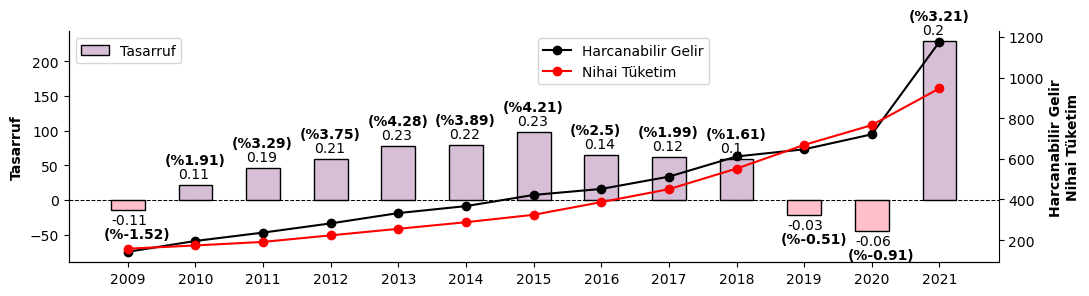

In [27]:
har_gelir  = top_gelir -  (sgk_prim_ödeme + faiz_odeme + urun_sub + \
             urt_sub + sig_prim + is_bir_gider + diger_ces_tranf_gider)

nih_tuk = df2.iloc[22]
tas = df2.iloc[23]
ort_tas_egilim = tas / har_gelir
tas_oran = tas / gsmh

fig, ax = plt.subplots(figsize = (12,3))

width = 0.5
ind = np.arange(len(yillar))


for k in range(len(yillar)):
    if tas.to_list()[k] > 0:
        if tas[k] == tas[5]:
            ax.bar(ind[k], tas[k],width, edgecolor = "k", color = "thistle", label = "Tasarruf")
        else:
            ax.bar(ind[k], tas[k],width, edgecolor = "k", color = "thistle")
    else:
        ax.bar(ind[k], tas[k], width,edgecolor = "k", color = "pink")
              
ax.axhline(y = 0, lw=0.75, ls = "--", color = "k")


for index in range(len(yillar)):
    if tas[index] < 0:
        ax.text(ind[index] - .25, tas[index]-20, str(round(ort_tas_egilim[index], 2)))
    else:
        ax.text(ind[index] - .25, tas[index]+10, str(round(ort_tas_egilim[index], 2)))
        
for index in range(len(yillar)):
    if tas[index] < 0:
        ax.text(ind[index] - .35, tas[index]-40, "(%" + str(round(tas_oran[index]*100, 2)) + ")",
              fontweight = "bold" )
    else:
        ax.text(ind[index] - .46, tas[index]+30, "(%" + str(round(tas_oran[index]*100, 2)) + ")",
               fontweight = "bold")
        

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(loc = 2)
ax.set_ylabel("Tasarruf", fontweight = "bold")
ax.set_title("")
ax.set_ylim(ymin = -90)

ax.set_xticks(ind)
ax.set_xticklabels(yillar)

ax2 = ax.twinx()
ax2.spines["top"].set_visible(False)
ax2.plot(har_gelir.to_list(), "-ok", label = "Harcanabilir Gelir")
ax2.plot(nih_tuk.to_list(), "-o", color = "red", label = "Nihai Tüketim")
ax2.legend( bbox_to_anchor=(0.497, 0.5, 0.5, 0.5))
ax2.set_ylabel("Harcanabilir Gelir\nNihai Tüketim", fontweight = "bold")

# Şekil 9: Yatırım – Tasarruf ve Dış Ticaret Dengesi (milyar TL)

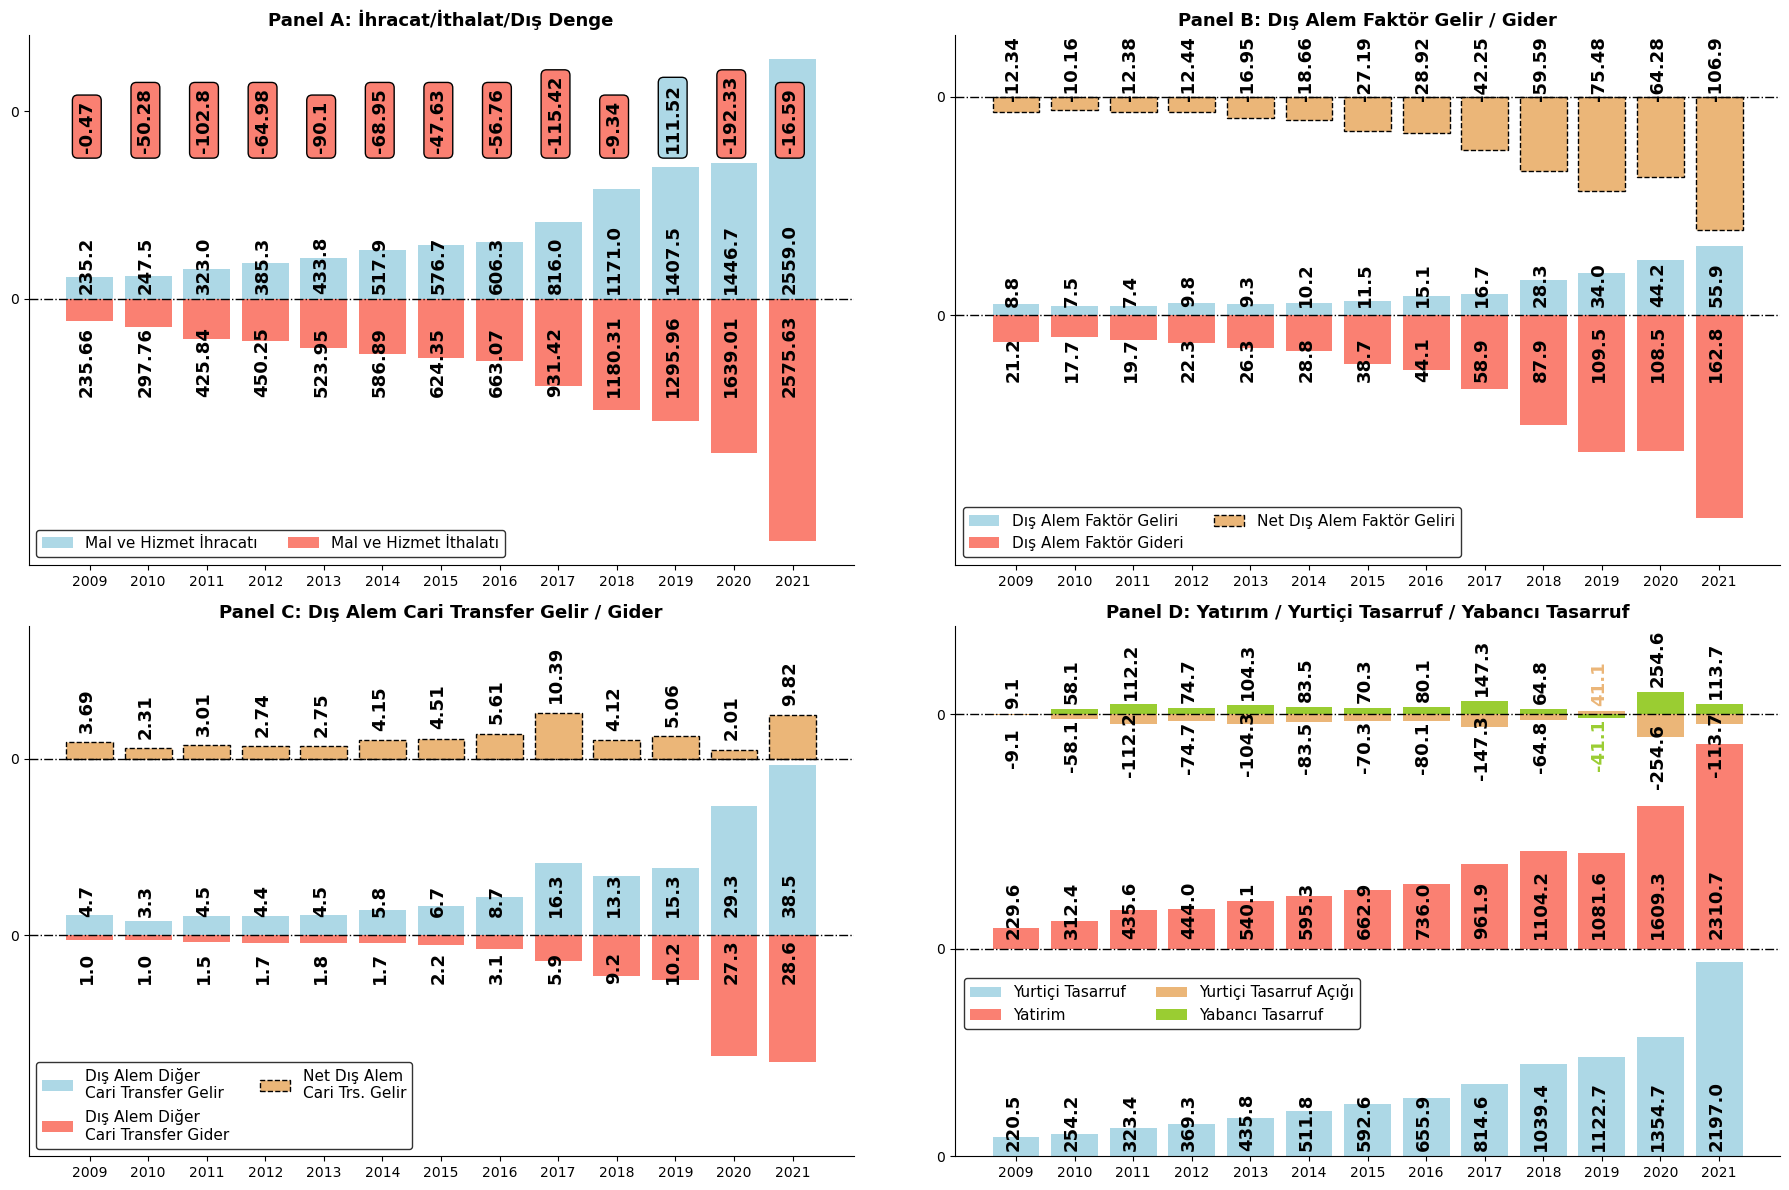

In [28]:
cols = [str(x) for x in range(2009,2022)]

inds_cells3 = [
    ("Mal İhracatı", "N56"),
    ("Hizmet İhracatı", "N57"),
    ("Mal İthalatı", "G59"),
    ("Hizmet İthalatı", "G60"),
    ("Mal ve Hizmet Dış Dengesi", "N61"),
    
    ("Ucret Geliri", "N13"),
    ("Faiz Geliri", "N31"),
    ("Kar Payı Geliri", "N32"),
    ("DYY üzerine YYK (Gelir)", "N33"),
    ("Ücret Ödemeleri", "G23"),
    ("Faiz Ödemeleri", "G31"),
    ("Kar Payı Ödemeleri", "G32"),
    ("DYY üzerine YYK (Ödeme)", "G33"),
    
    ("NHDS Prim", "N44"),
    ("Cari Uluslarası İşbirliği (Gelir)", "N46"),
    ("Diğer Çeşitli Transferler (Gelir)", "N47"),
    
    ("Sosyal Fayda", "G42"),
    
    ("HDS Tazminat", "G45"),
    ("Cari Uluslarası İşbirliği (Ödeme)", "G46"),
    ("Cari Dış Denge", "N63"),
    ("Üretim Sektörü Tasarruf", "I54"),
    ("Finans Sektörü Tasarruf", "J54"),
    ("Kamu Kesimi Tasarruf", "K54"),
    ("Özel Kesim Tasarruf", "L54"),
    ("Sabit Sermaye Oluşumu (Yatırım)", "M71"),

             
             ]

ind3   = [x[0] for x in inds_cells3]
cells3 = [x[1] for x in inds_cells3]

df3 = pd.DataFrame(columns = cols, index = ind3)

for data in cols:
    wb3 = xl.load_workbook("./Kurumsal Sektor Hesaplari - Duzenli/KSH_excel_format_" + data +".xlsx")
    sheet3 = wb3["Sheet1"]
    
    for row, cell in zip(ind3, cells3):
        value = sheet3[cell].value
        df3.loc[row][data] = value
        
df3 = df3/1000000

#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------
#----------------------------------------------------------------------



mal_ihr = df3.iloc[0]
hzm_ihr = df3.iloc[1]
mal_ith = df3.iloc[2]
hzm_ith = df3.iloc[3]
dis_denge = df3.iloc[4]

#--------------------------
ucret_gelir = df3.iloc[5]
faiz_gelir = df3.iloc[6]
kar_payi_gelir = df3.iloc[7]
dyy_gelir = df3.iloc[8]

ucret_odeme = df3.iloc[9]
faiz_odeme = df3.iloc[10]
kar_payi_odeme = df3.iloc[11]
dyy_odeme = df3.iloc[12]
#---------------------------

nhds_prim_gelir = df3.iloc[13]
ulus_is_gelir = df3.iloc[14]
diger_trs_gelir = df3.iloc[15]

sosyal_fayda_odeme = df3.iloc[16]
hds_tazminat_odeme = df3.iloc[17]
ulus_is_odeme = df3.iloc[18]


cari_dis_denge = df3.iloc[19]
tas_uretim = df3.iloc[20]
tas_finans = df3.iloc[21]
tas_kamu = df3.iloc[22]
tas_hane = df3.iloc[23]

yatirim = df3.iloc[24]

#-----------------MAL DENGESİ-------------------
top_ihr = mal_ihr + hzm_ihr
top_ith = mal_ith + hzm_ith

#-----------------FAKTÖR DENGESİ-------------------
top_faktor_gelir = ucret_gelir + faiz_gelir + kar_payi_gelir + dyy_gelir
top_faktor_odeme = ucret_odeme + faiz_odeme + kar_payi_odeme + dyy_odeme

#-----------------CARi TRANSFER DENGE-------------------
top_cari_gelir = nhds_prim_gelir + ulus_is_gelir + diger_trs_gelir
top_cari_odeme = hds_tazminat_odeme + ulus_is_odeme + sosyal_fayda_odeme

top_tas = tas_uretim + tas_finans + tas_kamu + tas_hane


#-----------------------------------------------

years = top_ihr.index.to_list()
ind = np.arange(0, len(years))
width = 0.8

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (18,12))

#-------------------------------------------------
ax1.bar(ind, top_ihr, width, edgecolor = "none",
        color ="lightblue", label = "Mal ve Hizmet İhracatı" )

ax1.bar(ind, -1*top_ith, width, edgecolor = "none",
        color = "salmon", label = "Mal ve Hizmet İthalatı" )



i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2,
             100, 
             str(round(top_ihr[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)
    
i = 0
for j in range(len(ind)):
    ax1.text(ind[j]-.2,
             -1000, 
             str(round(top_ith[j], 2)),
             fontweight = "bold", fontsize = 13, rotation = 90)
    
i = 0
for j in range(len(ind)):
    
    if top_ihr[j] - top_ith[j] > 0:
        ax1.text(ind[j]-.2,
                 1600,
                 str(round((top_ihr[j] - top_ith[j]), 2)),
                 fontweight = "bold", fontsize = 13, rotation = 90,
                 bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round'))
    else:
        ax1.text(ind[j]-.2,
                 1600, 
                 str(round((top_ihr[j] - top_ith[j]), 2)),
                 fontweight = "bold", fontsize = 13, rotation = 90,
                 bbox=dict(facecolor='salmon', edgecolor='black', boxstyle='round'))

ax1.axhline(y=0, lw = 1, ls = "-.", color = "k")       
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_yticks([0,2000])
ax1.set_yticklabels([0,0])
ax1.set_xticks(ind)
ax1.set_xticklabels(years)

ax1.set_title("Panel A: İhracat/İthalat/Dış Denge", 
              fontsize = 13, fontweight = "bold")

ax1.legend(loc = 3, edgecolor = "k", ncol = 2, fontsize = 11)
#-----------------------------------------------------------------------------------------------
 

ax2.bar(ind, top_faktor_gelir, edgecolor = "none",
        color = "lightblue", label = "Dış Alem Faktör Geliri")
ax2.bar(ind, -1*top_faktor_odeme, edgecolor = "none",
        color = "salmon", label = "Dış Alem Faktör Gideri")

ax2.bar(ind, (top_faktor_gelir-top_faktor_odeme),width, edgecolor = "k",
        color = "#ebb678", label = "Net Dış Alem Faktör Geliri",
        bottom = 175, linestyle = "--")

ax2.set_ylim(ymax = 225, ymin = -200)
ax2.axhline(y=175, lw = 1, ls = "-.", color = "k")
ax2.axhline(y=0, lw = 1, ls = "-.", color = "k")

i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2,
             10, 
             str(round(top_faktor_gelir[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)

i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2,
             -50, 
             str(round(top_faktor_odeme[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)
    
i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2,
             175, 
             str(round(top_faktor_gelir[j] - top_faktor_odeme[j], 2)),
             fontweight = "bold", fontsize = 13, rotation = 90)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_yticks([0,175])
ax2.set_yticklabels([0,0])


ax2.set_xticks(ind)
ax2.set_xticklabels(years)
ax2.set_title("Panel B: Dış Alem Faktör Gelir / Gider", 
              fontsize = 13, fontweight = "bold")
ax2.legend(loc = 3, edgecolor = "k", ncol = 2, fontsize = 11)

#-------------------------------------------------------------------------
ax3.bar(ind, top_cari_gelir, edgecolor = "none",
        color = "lightblue", label = "Dış Alem Diğer\nCari Transfer Gelir" )

ax3.bar(ind, -1*top_cari_odeme, edgecolor = "none",
        color = "salmon", label = "Dış Alem Diğer\nCari Transfer Gider")
ax3.bar(ind, (top_cari_gelir-top_cari_odeme),width, edgecolor = "k",
        color = "#ebb678", label = "Net Dış Alem\nCari Trs. Gelir",
        bottom = 40,  linestyle = "--")

ax3.set_ylim(ymax = 70, ymin = -50)
ax3.axhline(y=40, lw = 1, ls = "-.", color = "k")
ax3.axhline(y=0, lw = 1, ls = "-.", color = "k")


i = 0
for j in range(len(ind)):
    ax3.text(ind[j]-.2,
             5, 
             str(round(top_cari_gelir[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)



i = 0
for j in range(len(ind)):
    ax3.text(ind[j]-.2,
             -10, 
             str(round(top_cari_odeme[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)

i = 0
for j in range(len(ind)):
    ax3.text(ind[j]-.2,
             43 + (top_cari_gelir[j] - top_cari_odeme[j]), 
             str(round(top_cari_gelir[j] - top_cari_odeme[j], 2)),
             fontweight = "bold", fontsize = 13, rotation = 90)

    
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_yticks([0,40])
ax3.set_yticklabels([0,0])

ax3.set_xticks(ind)
ax3.set_xticklabels(years)
ax3.set_title("Panel C: Dış Alem Cari Transfer Gelir / Gider", 
              fontsize = 13, fontweight = "bold")
ax3.legend(loc = 3, edgecolor = "k", ncol = 2, fontsize = 11)

#------------------------------------------------------------------------------------------


ax4.bar(ind, top_tas, edgecolor = "none",
        color = "lightblue", label = "Yurtiçi Tasarruf")

ax4.bar(ind, yatirim, edgecolor = "none",
        color = "salmon", label = "Yatirim",
       bottom = 2350)

ax4.bar(ind, (top_tas-yatirim),width, edgecolor = "none",
        color = "#ebb678", label = "Yurtiçi Tasarruf Açığı",
        bottom = 5000)

ax4.bar(ind, 
        -1*(top_ihr-top_ith + top_faktor_gelir - top_faktor_odeme + top_cari_gelir - top_cari_odeme),
        width, edgecolor = "none",
        color = "yellowgreen", label = "Yabancı Tasarruf",
        bottom = 5000)


ax4.axhline(y=2350, lw = 1, ls = "-.", color = "k")
ax4.axhline(y=5000, lw = 1, ls = "-.", color = "k")



for j in range(len(ind)):
    ax4.text(ind[j]-.2,
             100, 
             str(round(top_tas[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)



for j in range(len(ind)):
    
    ax4.text(ind[j]-.2,
             2500, 
             str(round(yatirim[j], 1)),
             fontweight = "bold", fontsize = 13, rotation = 90)



for j in range(len(ind)):
    
    if (top_tas - yatirim)[j] > 0:
        ax4.text(ind[j]-.2,
                 5000 + (top_tas - yatirim)[j]+100,
                 str(round((top_tas-yatirim)[j], 1)),
                 fontweight = "bold", fontsize = 13, rotation = 90, color = "#ebb678" )
    else:
        ax4.text(ind[j]-.2,
                 5000 + (top_tas - yatirim)[j]-550, 
                 str(round((top_tas-yatirim)[j], 1)),
                 fontweight = "bold", fontsize = 13, rotation = 90)
        
for j in range(len(ind)):
    
    yab_tas = -1*(top_ihr-top_ith + top_faktor_gelir - top_faktor_odeme + 
                  top_cari_gelir - top_cari_odeme)
    
    if (yab_tas)[j] < 0:
        ax4.text(ind[j]-.2,
                 5000 + yab_tas[j] - 550, 
                 str(round((yab_tas)[j], 1)),
                 fontweight = "bold", fontsize = 13, rotation = 90, color = "yellowgreen")

    else:
        ax4.text(ind[j]-.2,
                 5000 + yab_tas[j] + 100, 
                 str(round((yab_tas)[j], 1)),
                 fontweight = "bold", fontsize = 13, rotation = 90 )


ax4.set_ylim(ymax = 6000)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.set_yticks([0,2350,5000])
ax4.set_yticklabels([0,0,0])

ax4.set_xticks(ind)
ax4.set_xticklabels(years)
ax4.set_title("Panel D: Yatırım / Yurtiçi Tasarruf / Yabancı Tasarruf", 
              fontsize = 13, fontweight = "bold")
ax4.legend(bbox_to_anchor = [0.5,0.35],
           edgecolor = "k",
           ncol = 2,
           fontsize = 11)


plt.tight_layout()



# Şekil 10: Yatırım – Tasarruf ve Dış Ticaret Dengesi (milyar TL)

Text(0.5, 1.0, 'Panel B')

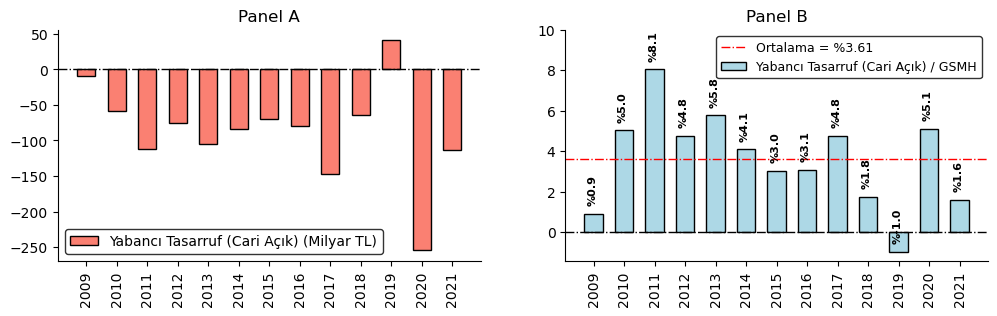

In [29]:
mal_dengesi  = top_ihr-top_ith
faktor_denge = top_faktor_gelir - top_faktor_odeme
cari_trs_denge = top_cari_gelir - top_cari_odeme

yab_tas = mal_dengesi + faktor_denge + cari_trs_denge
yab_tas_oran = (-1*yab_tas / gsmh)*100



years = mal_dengesi.index.to_list()
ind = np.arange(len(years))
width = 0.6

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,3))
ax1.bar(ind, yab_tas, width, edgecolor = "k",
       color = "salmon", label = "Yabancı Tasarruf (Cari Açık) (Milyar TL)")
ax2.bar(ind, yab_tas_oran, width, edgecolor = "k",
       color = "lightblue", label = "Yabancı Tasarruf (Cari Açık) / GSMH")


i = 0
for j in range(len(ind)):
    ax2.text(ind[j]-.2,
             yab_tas_oran[j] + .5, 
             "%" + str(round(yab_tas_oran[j], 1)),
             fontweight = "bold", fontsize = 8, rotation = 90)



ax1.axhline(y=0, lw = 1, ls = "-.", color = "k")
ax2.axhline(y=0, lw = 1, ls = "-.", color = "k")
ax2.axhline(y=np.mean(yab_tas_oran), lw = 1, ls = "-.",
            color = "r", label = "Ortalama = %{}".format(round(np.mean(yab_tas_oran),2)))

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax1.set_xticks(ind)
ax1.set_xticklabels(years, rotation = 90)
ax2.set_xticks(ind)
ax2.set_xticklabels(years, rotation = 90)
ax2.set_ylim(ymax = 10)

ax1.legend(loc = 3, edgecolor = "k")
ax2.legend(edgecolor = "k", fontsize = 9)
ax1.set_title("Panel A", fontsize = 12)
ax2.set_title("Panel B", fontsize = 12)


# EK TABLOLAR

In [30]:
df1.to_excel("./Metin İci Tablolar/Ek_tablo_2_Hanehalki.xlsx")
df2.to_excel("./Metin İci Tablolar/Ek_tablo_3_KamuKesimi.xlsx")
df3.to_excel("./Metin İci Tablolar/Ek_tablo_4_YatirimTasarrufDisDenge.xlsx")

In [31]:
cols = [str(x) for x in range(2009,2022)]

inds_cells4 = [
    ("Toplam Çıktı", "F2"),
    ("Ara Tüketim", "M6"),
    ("GSYH", "M9"),
    ("GSMH", "M36"),
    ("Üretim Sektörü Katma Değer", "I7"),
    ("Finans Sektörü Katma Değer", "J7"),
    ("Devlet Katma Değer", "K7"),
    ("Hanehalkı Katma Değer", "L7"),
    ("Hanehalkı Nihai Tüketim", "L50"),
    ("Devlet Nihai Tüketim", "K50"),
    ("Üretim Sektörü Sabit Sermaye Oluşumu (Yatırım)", "I71"),
    ("Finans Sektörü Sabit Sermaye Oluşumu (Yatırım)", "J71"),
    ("Devlet Sabit Sermaye Oluşumu (Yatırım)", "K71"),
    ("Hanehalkı Sabit Sermaye Oluşumu (Yatırım)", "L71"),
    ("Mal ve Hizmet İhracatı", "N55"),
    ("Mal ve Hizmet İthalatı", "G58"),
    ("Brüt İşletme Artığı (Sermaye Faktör Geliri)", "F21"),
    ("Çlş. Yapılan Ödemeler (Ücret faktör Geliri)", "M13"),
    ("Ürün Üzerindeki Vergi", "D25"),
    ("Üretim Üzerindeki Vergi", "D26"),
    ("Ürün üzerindeki sübvansiyon", "K28"),
    ("Üretim üzerindeki sübvansiyon", "K29"),
             
             ]

ind4   = [x[0] for x in inds_cells4]
cells4 = [x[1] for x in inds_cells4]

df4 = pd.DataFrame(columns = cols, index = ind4)

for data in cols:
    wb4 = xl.load_workbook("./Kurumsal Sektor Hesaplari - Duzenli/KSH_excel_format_" + data +".xlsx")
    sheet4 = wb4["Sheet1"]
    
    for row, cell in zip(ind4, cells4):
        value = sheet4[cell].value
        df4.loc[row][data] = value
        
df4.to_excel("./Metin İci Tablolar/Ek_tablo_1_EkonomikBuyuklukler.xlsx")

# 1. Bölüm Sonuç Kısmı için Özet Tablo

In [32]:
df_columns = ["GSMH", "GSKD","Ürün Vergi", "Ürün Sübvansiyon", "Ürün Net Vergi", "Üretim vergi", "Üretim Sübvansiyon", "Üretim Net Vergi", "Yatırım", "Ücret", "Sermaye", "Gelir_Vergisi",
              "HH_Nihai_TH", "Devlet_Nihai_TH", "Yurtiçi_Tasarruf", "HH_Tasarruf", "Devlet_Tasarruf",
              "Yabancı Tasarruf", "İhracat", "İthalat", "Net İhracat"]

Ana_tablo_index = [195, 27,33, 34, 32,36,37, 35, 39, 62, 69, 137, 178, 179, 182, (183, 184, 187), 185, 199, 188, 189, 190 ]

df5 = pd.DataFrame(index = range(2009, 2022), columns = df_columns)
df5_ortalama = pd.DataFrame(index = range(2009, 2022), columns = df_columns)

for i in range(len(Ana_tablo_index)):
    if type(Ana_tablo_index[i]) == tuple:
        value = np.zeros(13)
        for j in Ana_tablo_index[i]:
            value = value +  np.array(df.loc[j])
        df5[df_columns[i]] = value
    else:
        df5[df_columns[i]] = np.array(df.loc[Ana_tablo_index[i]])

for i in df5.columns:
    df5_ortalama[i] = df5[i].to_numpy() / df5["GSMH"].to_numpy() 
df5_ortalama.mean()

df5

,GSMH,GSKD,Ürün Vergi,Ürün Sübvansiyon,Ürün Net Vergi,Üretim vergi,Üretim Sübvansiyon,Üretim Net Vergi,Yatırım,Ücret,...,Gelir_Vergisi,HH_Nihai_TH,Devlet_Nihai_TH,Yurtiçi_Tasarruf,HH_Tasarruf,Devlet_Tasarruf,Yabancı Tasarruf,İhracat,İthalat,Net İhracat
2009,994.033426,898.263064,112.939839,4.830422,108.109417,5.994673,4.980181,1.014492,229.617409,268.995549,...,64.256767,619.648345,157.576388,220.502779,235.562679,-15.0599,-9.114629,235.191253,235.660914,-0.469661
2010,1157.502766,1027.561054,144.97084,4.867415,140.103425,8.285341,4.41521,3.870131,312.379604,314.230941,...,71.84576,731.881897,173.684929,254.24438,232.108243,22.136137,-58.135224,247.476366,297.758318,-50.281951
2011,1392.550099,1237.146314,173.900961,6.11966,167.781301,9.183568,5.192807,3.990761,435.574353,371.489346,...,85.695726,881.073483,191.075146,323.408636,277.525959,45.882677,-112.165716,323.044859,425.840225,-102.795366
2012,1569.042526,1397.219904,190.276251,6.016904,184.259347,10.565122,5.678463,4.886659,443.966452,438.577769,...,96.875539,979.094895,223.401702,369.285221,310.458795,58.826426,-74.681231,385.262192,450.24599,-64.983799
2013,1806.477891,1599.03931,230.614415,6.22641,224.388005,12.301467,7.093085,5.208382,540.089339,506.358759,...,104.091853,1117.823566,255.615056,435.7854,358.385016,77.400384,-104.303939,433.848234,523.94888,-90.100645
2014,2036.235844,1818.621907,242.288467,6.012547,236.275921,14.155765,17.030439,-2.874674,595.251775,590.55799,...,123.120336,1240.49609,288.096259,511.790042,432.572182,79.21786,-83.461733,517.948129,586.894426,-68.946297
2015,2323.751537,2073.020639,284.480192,6.559488,277.920704,15.875026,20.864617,-4.989591,662.946702,683.728668,...,134.851112,1411.072945,324.551507,592.636172,494.910269,97.725904,-70.31053,576.715941,624.345752,-47.629811
2016,2597.637597,2316.930424,316.576273,6.946987,309.629285,16.925864,32.815637,-15.889773,735.951619,840.20509,...,155.898108,1560.395822,386.976636,655.872787,590.993105,64.879682,-80.078832,606.30215,663.066518,-56.764367
2017,3091.455772,2779.809362,363.195474,9.300568,353.894906,20.364515,45.923868,-25.559353,961.866022,947.014585,...,184.370816,1836.62805,450.634678,814.579202,752.942438,61.636764,-147.28682,815.998489,931.422972,-115.424483
2018,3699.182366,3369.59902,397.524282,8.349575,389.174707,22.689295,56.495913,-33.806618,1104.21681,1129.021664,...,243.675557,2111.939675,551.962054,1039.404226,979.804599,59.599627,-64.812584,1170.966196,1180.311008,-9.344812


In [33]:
for i in df5.columns:
    df5_ortalama[i] = df5[i].to_numpy() / df5["GSMH"].to_numpy()  * 100
df5_ortalama.loc["Ortalama"] = df5_ortalama.mean()
df5_ortalama

,GSMH,GSKD,Ürün Vergi,Ürün Sübvansiyon,Ürün Net Vergi,Üretim vergi,Üretim Sübvansiyon,Üretim Net Vergi,Yatırım,Ücret,...,Gelir_Vergisi,HH_Nihai_TH,Devlet_Nihai_TH,Yurtiçi_Tasarruf,HH_Tasarruf,Devlet_Tasarruf,Yabancı Tasarruf,İhracat,İthalat,Net İhracat
2009,100.0,90.365479,11.361775,0.485942,10.875833,0.603065,0.501007,0.102058,23.099566,27.061016,...,6.464246,62.336771,15.852222,22.182632,23.697662,-1.51503,-0.916934,23.660296,23.707544,-0.047248
2010,100.0,88.773961,12.524449,0.42051,12.103939,0.715794,0.381443,0.334352,26.987374,27.147317,...,6.206962,63.229386,15.005142,21.964905,20.0525,1.912405,-5.02247,21.380197,25.724199,-4.344003
2011,100.0,88.840345,12.48795,0.439457,12.048493,0.659478,0.372899,0.286579,31.2789,26.676911,...,6.15387,63.270505,13.72124,23.224201,19.929334,3.294867,-8.054699,23.198078,30.579885,-7.381807
2012,100.0,89.049206,12.126902,0.383476,11.743426,0.673348,0.361906,0.311442,28.295374,27.951936,...,6.174182,62.400788,14.238091,23.535705,19.786512,3.749193,-4.759669,24.553967,28.695589,-4.141621
2013,100.0,88.51696,12.765969,0.344671,12.421298,0.680964,0.392647,0.288317,29.897368,28.030166,...,5.762144,61.878619,14.149913,24.123484,19.838882,4.284602,-5.773884,24.016249,29.003891,-4.987642
2014,100.0,89.312931,11.898841,0.295278,11.603564,0.695193,0.836369,-0.141176,29.232948,29.002436,...,6.046467,60.921042,14.148472,25.134124,21.243717,3.890407,-4.098824,25.436549,28.822517,-3.385968
2015,100.0,89.210081,12.242281,0.28228,11.960001,0.683164,0.897885,-0.214721,28.529156,29.423484,...,5.803164,60.723917,13.966704,25.503423,21.2979,4.205523,-3.025734,24.818313,26.868008,-2.049695
2016,100.0,89.193752,12.187084,0.267435,11.919649,0.651587,1.263288,-0.611701,28.331574,32.34497,...,6.001534,60.069804,14.897253,25.248818,22.751176,2.497642,-3.082756,23.340521,25.525751,-2.18523
2017,100.0,89.919105,11.748364,0.300848,11.447516,0.658735,1.485509,-0.826774,31.113692,30.633289,...,5.963883,59.409812,14.576779,26.349373,24.355595,1.993778,-4.764319,26.395283,30.128944,-3.733661
2018,100.0,91.090373,10.746274,0.225714,10.52056,0.61336,1.527254,-0.913894,29.850294,30.520844,...,6.587282,57.092067,14.921191,28.098215,26.487059,1.611157,-1.752079,31.65473,31.907348,-0.252618
